# VERSIONE IN CUI HO 2 CANALI SEPARATI

*TX1-->RX1 canale 6 |
 TX2-->RX2 canale 11*

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from hampel import hampel
from scipy.signal import savgol_filter

In [2]:
assenza_rx1 = pd.read_csv('Dati_2_canali/Assenzarx1.csv')
assenza_rx2= pd.read_csv('Dati_2_canali/Assenzarx2.csv')

una_movimento_rx1=pd.read_csv('Dati_2_canali/Una_movimentorx1.csv')
una_movimento_rx2=pd.read_csv('Dati_2_canali/Una_movimentorx2.csv')

una_ferma_rx1=pd.read_csv('Dati_2_canali/Una_fermarx1.csv')
una_ferma_rx2=pd.read_csv('Dati_2_canali/Una_fermarx2.csv')

due_movimento_rx1=pd.read_csv('Dati_2_canali/Due_movimentorx1.csv')
due_movimento_rx2=pd.read_csv('Dati_2_canali/Due_movimentorx2.csv')

due_ferme_rx1=pd.read_csv('Dati_2_canali/Due_fermerx1.csv')
due_ferme_rx2=pd.read_csv('Dati_2_canali/Due_fermerx2.csv')

In [3]:
def convert_to_complex(csi_data):
    # Assumiamo che csi_data sia una lista con alternanza di I e Q
    complex_data = []
    for i in range(0, len(csi_data), 2):  # passo di 2 per prendere I e Q
        real = csi_data[i]
        imag = csi_data[i+1] if i+1 < len(csi_data) else 0
        complex_data.append(complex(real, imag))
    return complex_data

In [4]:
# convertiamo le stringhe in liste di numeri 

assenza_rx1['data'] = assenza_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
assenza_rx2['data'] = assenza_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

una_movimento_rx1['data'] = una_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_movimento_rx2['data'] = una_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
una_ferma_rx1['data'] = una_ferma_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_ferma_rx2['data'] = una_ferma_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_movimento_rx1['data'] = due_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_movimento_rx2['data'] = due_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_ferme_rx1['data'] = due_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_ferme_rx2['data'] = due_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [5]:
#trasformo i dati in numeri complessi
assenza_rx1['data_complex'] = assenza_rx1['data'].apply(convert_to_complex)
assenza_rx2['data_complex'] = assenza_rx2['data'].apply(convert_to_complex)

una_movimento_rx1['data_complex'] = una_movimento_rx1['data'].apply(convert_to_complex)
una_movimento_rx2['data_complex'] = una_movimento_rx2['data'].apply(convert_to_complex)

una_ferma_rx1['data_complex'] = una_ferma_rx1['data'].apply(convert_to_complex)
una_ferma_rx2['data_complex'] = una_ferma_rx2['data'].apply(convert_to_complex)

due_movimento_rx1['data_complex'] = due_movimento_rx1['data'].apply(convert_to_complex)
due_movimento_rx2['data_complex'] = due_movimento_rx2['data'].apply(convert_to_complex)

due_ferme_rx1['data_complex'] = due_ferme_rx1['data'].apply(convert_to_complex)
due_ferme_rx2['data_complex'] = due_ferme_rx2['data'].apply(convert_to_complex)



In [6]:
# Seleziona solo le colonne di interesse, in questo caso tieniamo i csi e i timestamp 
columns_to_keep = ['data_complex', 'local_timestamp']

# Rimuovi tutte le altre colonne
assenza_rx1_cleaned = assenza_rx1[columns_to_keep]
assenza_rx2_cleaned = assenza_rx2[columns_to_keep]

una_movimento_rx1_cleaned = una_movimento_rx1[columns_to_keep]
una_movimento_rx2_cleaned = una_movimento_rx2[columns_to_keep]

una_ferma_rx1_cleaned = una_ferma_rx1[columns_to_keep]
una_ferma_rx2_cleaned = una_ferma_rx2[columns_to_keep]

due_movimento_rx1_cleaned = due_movimento_rx1[columns_to_keep]
due_movimento_rx2_cleaned = due_movimento_rx2[columns_to_keep]

due_ferme_rx1_cleaned = due_ferme_rx1[columns_to_keep]
due_ferme_rx2_cleaned = due_ferme_rx2[columns_to_keep]



In [7]:
# Separiamo i numeri complessi in colonne direttamente nel DataFrame originale
assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
assenza_rx2_cleaned[[f'{i}' for i in range(len(assenza_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx2_cleaned['data_complex'].tolist(), index=assenza_rx2_cleaned.index)

una_movimento_rx1_cleaned[[f'{i}' for i in range(len(una_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx1_cleaned['data_complex'].tolist(), index=una_movimento_rx1_cleaned.index)
una_movimento_rx2_cleaned[[f'{i}' for i in range(len(una_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx2_cleaned['data_complex'].tolist(), index=una_movimento_rx2_cleaned.index)

una_ferma_rx1_cleaned[[f'{i}' for i in range(len(una_ferma_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx1_cleaned['data_complex'].tolist(), index=una_ferma_rx1_cleaned.index)
una_ferma_rx2_cleaned[[f'{i}' for i in range(len(una_ferma_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx2_cleaned['data_complex'].tolist(), index=una_ferma_rx2_cleaned.index)

due_movimento_rx1_cleaned[[f'{i}' for i in range(len(due_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx1_cleaned['data_complex'].tolist(), index=due_movimento_rx1_cleaned.index)
due_movimento_rx2_cleaned[[f'{i}' for i in range(len(due_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx2_cleaned['data_complex'].tolist(), index=due_movimento_rx2_cleaned.index)

due_ferme_rx1_cleaned[[f'{i}' for i in range(len(due_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx1_cleaned['data_complex'].tolist(), index=due_ferme_rx1_cleaned.index)
due_ferme_rx2_cleaned[[f'{i}' for i in range(len(due_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx2_cleaned['data_complex'].tolist(), index=due_ferme_rx2_cleaned.index)

C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1592036970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1592036970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = 

In [8]:
# Rimuoviamo la colonna originale dei numeri complessi che ora sono state separate in colonne individuali

assenza_rx1_cleaned= assenza_rx1_cleaned.drop(columns=['data_complex'])
assenza_rx2_cleaned= assenza_rx2_cleaned.drop(columns=['data_complex'])

una_movimento_rx1_cleaned= una_movimento_rx1_cleaned.drop(columns=['data_complex'])
una_movimento_rx2_cleaned= una_movimento_rx2_cleaned.drop(columns=['data_complex'])

una_ferma_rx1_cleaned= una_ferma_rx1_cleaned.drop(columns=['data_complex'])
una_ferma_rx2_cleaned= una_ferma_rx2_cleaned.drop(columns=['data_complex'])

due_movimento_rx1_cleaned= due_movimento_rx1_cleaned.drop(columns=['data_complex'])
due_movimento_rx2_cleaned= due_movimento_rx2_cleaned.drop(columns=['data_complex'])

due_ferme_rx1_cleaned= due_ferme_rx1_cleaned.drop(columns=['data_complex'])
due_ferme_rx2_cleaned= due_ferme_rx2_cleaned.drop(columns=['data_complex'])


In [9]:
def split_csi_dataset(df: pd.DataFrame):
    """
    Divide un DataFrame CSI in due dataset separati:
      - LLTF (0..63)
      - HT-LTF (-64..-1, 0..63)
    
    Restituisce:
      lltf_data_df, htltf_data_df
    """
    # --- 0) Meta colonne da tenere (solo quelle presenti davvero) ---
    candidate_meta = ["rx", "local_timestamp", "mac"]
    meta_cols = [c for c in candidate_meta if c in df.columns]

    # --- 1) Mappa colonne 'numeric-like' -> interi ---
    numlike_map = {}
    for c in df.columns:
        try:
            ci = int(c)
            numlike_map[c] = ci
        except Exception:
            pass
    if numlike_map:
        df = df.rename(columns=numlike_map)

    # --- 2) Se NON abbiamo le 192 colonne 0..191, prova da 'data_complex' ---
    needed_cols = list(range(192))
    missing_numeric = [c for c in needed_cols if c not in df.columns]

    if missing_numeric:
        if "data_complex" not in df.columns:
            raise ValueError("Non trovo né le colonne 0..191 né la colonna 'data_complex'.")
        expanded = pd.DataFrame(
            df["data_complex"].apply(
                lambda x: list(x) if isinstance(x, (list, tuple, np.ndarray)) else np.nan
            ).tolist(),
            index=df.index
        )
        expanded.columns = list(range(expanded.shape[1]))
        if expanded.shape[1] < 192:
            raise ValueError(f"'data_complex' non ha 192 elementi (ne ha {expanded.shape[1]}).")
        expanded = expanded[needed_cols]
        for c in needed_cols:
            if c not in df.columns:
                df[c] = expanded[c]

    # --- 3) Indici sorgente ---
    lltf_src   = list(range(0, 64))       # 0..63
    ht_pos_src = list(range(64, 128))     # 64..127
    ht_neg_src = list(range(128, 192))    # 128..191

    # --- 4) Costruisci i due dataset ---
    lltf_df = pd.concat([df[meta_cols], df[lltf_src]], axis=1)

    htltf_part = pd.concat([df[ht_pos_src], df[ht_neg_src]], axis=1)
    htltf_part.columns = list(range(0, 64)) + list(range(-64, 0))
    ordered = list(range(-64, 0)) + list(range(0, 64))
    htltf_df = pd.concat([df[meta_cols], htltf_part[ordered]], axis=1)

    # --- 5) Rimuovi colonne sempre 0 ---
    def clean_zero_only(data_df):
        data_cols = [c for c in data_df.columns if c not in meta_cols]
        vals = data_df[data_cols].applymap(
            lambda z: 0+0j if (z is None or (isinstance(z, float) and np.isnan(z))) else complex(z)
        )
        mask_keep = (vals.to_numpy() != 0).any(axis=0)
        cols_to_keep = [col for col, keep in zip(data_cols, mask_keep) if keep]
        return pd.concat([data_df[meta_cols], data_df[cols_to_keep]], axis=1)

    lltf_cleaned = clean_zero_only(lltf_df)
    htltf_cleaned = clean_zero_only(htltf_df)

    return lltf_cleaned, htltf_cleaned


In [10]:
lltf_assenza_rx1, htltf_assenza_rx1 = split_csi_dataset(assenza_rx1_cleaned)
lltf_assenza_rx2, htltf_assenza_rx2 = split_csi_dataset(assenza_rx2_cleaned)

lltf_una_movimento_rx1, htltf_una_movimento_rx1 = split_csi_dataset(una_movimento_rx1_cleaned)
lltf_una_movimento_rx2, htltf_una_movimento_rx2 = split_csi_dataset(una_movimento_rx2_cleaned)

lltf_una_ferma_rx1, htltf_una_ferma_rx1 = split_csi_dataset(una_ferma_rx1_cleaned)
lltf_una_ferma_rx2, htltf_una_ferma_rx2 = split_csi_dataset(una_ferma_rx2_cleaned)

lltf_due_movimento_rx1, htltf_due_movimento_rx1 = split_csi_dataset(due_movimento_rx1_cleaned)
lltf_due_movimento_rx2, htltf_due_movimento_rx2 = split_csi_dataset(due_movimento_rx2_cleaned)

lltf_due_ferme_rx1, htltf_due_ferme_rx1 = split_csi_dataset(due_ferme_rx1_cleaned)
lltf_due_ferme_rx2, htltf_due_ferme_rx2 = split_csi_dataset(due_ferme_rx2_cleaned)

C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\2053294205

In [11]:
#levo le sottoportanti pilota  -53, -25, -11, +11, +25, +53, queste sono indicate nel documento esp 
def remove_pilot_subcarriers(df):
    pilot_indices = [-53, -25, -11, 11, 25, 53]
    cols_to_remove = [col for col in pilot_indices if col in df.columns]
    df_cleaned = df.drop(columns=cols_to_remove)
    return df_cleaned

htltf_assenza_rx1 = remove_pilot_subcarriers(htltf_assenza_rx1)
htltf_assenza_rx2 = remove_pilot_subcarriers(htltf_assenza_rx2)

htltf_due_movimento_rx1 = remove_pilot_subcarriers(htltf_due_movimento_rx1)
htltf_due_movimento_rx2 = remove_pilot_subcarriers(htltf_due_movimento_rx2)

htltf_due_ferme_rx1 = remove_pilot_subcarriers(htltf_due_ferme_rx1)
htltf_due_ferme_rx2 = remove_pilot_subcarriers(htltf_due_ferme_rx2)

htltf_una_movimento_rx1 = remove_pilot_subcarriers(htltf_una_movimento_rx1)
htltf_una_movimento_rx2 = remove_pilot_subcarriers(htltf_una_movimento_rx2)

htltf_una_ferma_rx1 = remove_pilot_subcarriers(htltf_una_ferma_rx1)
htltf_una_ferma_rx2 = remove_pilot_subcarriers(htltf_una_ferma_rx2)

In [12]:
#recupero gli indici delle sottoportanti 
subcarriers_htltf = [col for col in htltf_assenza_rx1.columns if col not in ['local_timestamp','rx']]

subcarriers_lltf=[col for col in lltf_assenza_rx1.columns if col not in ['local_timestamp','rx']]

#calcolo quante sono 
num_subcarriers_htltf = len(subcarriers_htltf)

num_subcarriers_lltf = len(subcarriers_lltf)    

In [13]:
num_subcarriers_htltf

108

In [14]:
num_subcarriers_lltf

52

In [15]:
def drop_time_window(df, time_col='local_timestamp', seconds=60, mode='head'):
    """
    Rimuove dal DataFrame tutte le righe dei primi o ultimi `seconds` secondi,
    sulla base della colonna temporale `time_col`.
    - mode='head' rimuove i primi N secondi
    - mode='tail' rimuove gli ultimi N secondi
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if mode == 'head':
        t0 = df[time_col].min()
        mask = df[time_col] >= (t0 + pd.Timedelta(seconds=seconds))
    elif mode == 'tail':
        t_end = df[time_col].max()
        mask = df[time_col] <= (t_end - pd.Timedelta(seconds=seconds))
    else:
        raise ValueError("mode deve essere 'head' oppure 'tail'")
    return df[mask].reset_index(drop=True)

In [16]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE LLTF
lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='local_timestamp', seconds=60, mode='head')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='local_timestamp', seconds=60, mode='head')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='local_timestamp', seconds=120, mode='head') # qui tolgo 120 secondi perche ho molto piu tempo
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='local_timestamp', seconds=120, mode='head')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='local_timestamp', seconds=60, mode='head')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='local_timestamp', seconds=60, mode='head')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='local_timestamp', seconds=120, mode='head')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='local_timestamp', seconds=120, mode='head')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='local_timestamp', seconds=60, mode='head')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='local_timestamp', seconds=60, mode='head')

lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='local_timestamp', seconds=60, mode='tail')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='local_timestamp', seconds=60, mode='tail')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='local_timestamp', seconds=120, mode='tail') # qui tolgo 120 secondi perche ho molto piu tempo
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='local_timestamp', seconds=120, mode='tail')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='local_timestamp', seconds=60, mode='tail')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='local_timestamp', seconds=60, mode='tail')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='local_timestamp', seconds=120, mode='tail')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='local_timestamp', seconds=120, mode='tail')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='local_timestamp', seconds=60, mode='tail')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='local_timestamp', seconds=60, mode='tail')

In [17]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE HTLTF

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='local_timestamp', seconds=60, mode='head')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='local_timestamp', seconds=60, mode='head')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='local_timestamp', seconds=120, mode='head') # qui tolgo 120 secondi perche ho molto piu tempo
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='local_timestamp', seconds=120, mode='head')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='local_timestamp', seconds=60, mode='head')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='local_timestamp', seconds=60, mode='head')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='local_timestamp', seconds=120, mode='head')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='local_timestamp', seconds=120, mode='head')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='local_timestamp', seconds=60, mode='head')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='local_timestamp', seconds=60, mode='head')

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='local_timestamp', seconds=60, mode='tail')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='local_timestamp', seconds=60, mode='tail')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='local_timestamp', seconds=120, mode='tail') # qui tolgo 120 secondi perche ho molto piu tempo
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='local_timestamp', seconds=120, mode='tail')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='local_timestamp', seconds=60, mode='tail')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='local_timestamp', seconds=60, mode='tail')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='local_timestamp', seconds=120, mode='tail')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='local_timestamp', seconds=120, mode='tail')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='local_timestamp', seconds=60, mode='tail')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='local_timestamp', seconds=60, mode='tail')

In [18]:
def apply_abs_to_subcarriers(df, subcarrier_cols):
    """
    Restituisce una copia del DataFrame con il modulo applicato solo alle colonne dei subcarrier.
    Non tocca eventuali colonne identificative (es: 'mac', timestamp, ecc).
    """
    df_mod = df.copy()
    df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
    return df_mod

In [19]:
# Calcolo il modulo dei dati LLTF per ogni condizione e per ogni ricevitore

modulo_assenza_lltf_rx1 = lltf_assenza_rx1.copy()
modulo_assenza_lltf_rx1[subcarriers_lltf] = lltf_assenza_rx1[subcarriers_lltf].applymap(np.abs)
modulo_assenza_lltf_rx2 = lltf_assenza_rx2.copy()
modulo_assenza_lltf_rx2[subcarriers_lltf] = lltf_assenza_rx2[subcarriers_lltf].applymap(np.abs)

modulo_due_movimento_lltf_rx1 = lltf_due_movimento_rx1.copy()
modulo_due_movimento_lltf_rx1[subcarriers_lltf] = lltf_due_movimento_rx1[subcarriers_lltf].applymap(np.abs)
modulo_due_movimento_lltf_rx2 = lltf_due_movimento_rx2.copy()
modulo_due_movimento_lltf_rx2[subcarriers_lltf] = lltf_due_movimento_rx2[subcarriers_lltf].applymap(np.abs)

modulo_due_ferme_lltf_rx1 = lltf_due_ferme_rx1.copy()
modulo_due_ferme_lltf_rx1[subcarriers_lltf] = lltf_due_ferme_rx1[subcarriers_lltf].applymap(np.abs)
modulo_due_ferme_lltf_rx2 = lltf_due_ferme_rx2.copy()
modulo_due_ferme_lltf_rx2[subcarriers_lltf] = lltf_due_ferme_rx2[subcarriers_lltf].applymap(np.abs)

modulo_una_movimento_lltf_rx1 = lltf_una_movimento_rx1.copy()
modulo_una_movimento_lltf_rx1[subcarriers_lltf] = lltf_una_movimento_rx1[subcarriers_lltf].applymap(np.abs)
modulo_una_movimento_lltf_rx2 = lltf_una_movimento_rx2.copy()
modulo_una_movimento_lltf_rx2[subcarriers_lltf] = lltf_una_movimento_rx2[subcarriers_lltf].applymap(np.abs)

modulo_una_ferma_lltf_rx1 = lltf_una_ferma_rx1.copy()
modulo_una_ferma_lltf_rx1[subcarriers_lltf] = lltf_una_ferma_rx1[subcarriers_lltf].applymap(np.abs)
modulo_una_ferma_lltf_rx2 = lltf_una_ferma_rx2.copy()
modulo_una_ferma_lltf_rx2[subcarriers_lltf] = lltf_una_ferma_rx2[subcarriers_lltf].applymap(np.abs)


C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1356980896.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_assenza_lltf_rx1[subcarriers_lltf] = lltf_assenza_rx1[subcarriers_lltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1356980896.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_assenza_lltf_rx2[subcarriers_lltf] = lltf_assenza_rx2[subcarriers_lltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1356980896.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_due_movimento_lltf_rx1[subcarriers_lltf] = lltf_due_movimento_rx1[subcarriers_lltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\1356980896.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_due_movimento_lltf_rx2[subcarriers_lltf] = lltf_due_movimento_rx2[subcarriers_lltf].appl

In [20]:
# Calcolo il modulo dei dati HTLF per ogni condizione e per ogni ricevitore

modulo_assenza_htltf_rx1 = htltf_assenza_rx1.copy()
modulo_assenza_htltf_rx1[subcarriers_htltf] = htltf_assenza_rx1[subcarriers_htltf].applymap(np.abs)
modulo_assenza_htltf_rx2 = htltf_assenza_rx2.copy()
modulo_assenza_htltf_rx2[subcarriers_htltf] = htltf_assenza_rx2[subcarriers_htltf].applymap(np.abs)

modulo_due_movimento_htltf_rx1 = htltf_due_movimento_rx1.copy()
modulo_due_movimento_htltf_rx1[subcarriers_htltf] = htltf_due_movimento_rx1[subcarriers_htltf].applymap(np.abs)
modulo_due_movimento_htltf_rx2 = htltf_due_movimento_rx2.copy()
modulo_due_movimento_htltf_rx2[subcarriers_htltf] = htltf_due_movimento_rx2[subcarriers_htltf].applymap(np.abs)

modulo_due_ferme_htltf_rx1 = htltf_due_ferme_rx1.copy()
modulo_due_ferme_htltf_rx1[subcarriers_htltf] = htltf_due_ferme_rx1[subcarriers_htltf].applymap(np.abs)
modulo_due_ferme_htltf_rx2 = htltf_due_ferme_rx2.copy()
modulo_due_ferme_htltf_rx2[subcarriers_htltf] = htltf_due_ferme_rx2[subcarriers_htltf].applymap(np.abs)

modulo_una_movimento_htltf_rx1 = htltf_una_movimento_rx1.copy()
modulo_una_movimento_htltf_rx1[subcarriers_htltf] = htltf_una_movimento_rx1[subcarriers_htltf].applymap(np.abs)
modulo_una_movimento_htltf_rx2 = htltf_una_movimento_rx2.copy()
modulo_una_movimento_htltf_rx2[subcarriers_htltf] = htltf_una_movimento_rx2[subcarriers_htltf].applymap(np.abs)

modulo_una_ferma_htltf_rx1 = htltf_una_ferma_rx1.copy()
modulo_una_ferma_htltf_rx1[subcarriers_htltf] = htltf_una_ferma_rx1[subcarriers_htltf].applymap(np.abs)
modulo_una_ferma_htltf_rx2 = htltf_una_ferma_rx2.copy()
modulo_una_ferma_htltf_rx2[subcarriers_htltf] = htltf_una_ferma_rx2[subcarriers_htltf].applymap(np.abs)


C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\50822106.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_assenza_htltf_rx1[subcarriers_htltf] = htltf_assenza_rx1[subcarriers_htltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\50822106.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_assenza_htltf_rx2[subcarriers_htltf] = htltf_assenza_rx2[subcarriers_htltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\50822106.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_due_movimento_htltf_rx1[subcarriers_htltf] = htltf_due_movimento_rx1[subcarriers_htltf].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_28412\50822106.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  modulo_due_movimento_htltf_rx2[subcarriers_htltf] = htltf_due_movimento_rx2[subcarriers_htl

In [21]:
def segment_csi_data(df, 
                     time_col='local_timestamp', 
                     subcarrier_cols=None, 
                     window_sec=6, 
                     overlap_sec=3):
    """
    Segmenta i dati CSI in finestre temporali sovrapposte.
    - df: DataFrame con almeno colonna temporale e sottoportanti (ampiezze float o |csi|).
    - time_col: nome colonna timestamp (stringa compatibile con pd.to_datetime)
    - subcarrier_cols: lista colonne delle sottoportanti (se None, tutte quelle numeriche)
    - window_sec: durata finestra (secondi)
    - overlap_sec: overlap tra finestre (secondi)
    Ritorna: lista di array shape (n_packets_window, n_subcarriers)
    """
    # Preprocessing robusto
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if subcarrier_cols is None:
        # Prendi solo colonne numeriche (escludendo timestamp/mac)
        subcarrier_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    
    # Ordina per timestamp
    df = df.sort_values(time_col).reset_index(drop=True)
    times = df[time_col].values.astype('datetime64[s]')
    start_time = times[0]
    end_time = times[-1]
    window = np.timedelta64(window_sec, 's')
    step = np.timedelta64(window_sec - overlap_sec, 's')

    bundles = []
    w = 0
    current_start = start_time
    while current_start + window <= end_time:
        current_end = current_start + window
        mask = (times >= current_start) & (times < current_end)
        bundle = df.loc[mask, subcarrier_cols].values
        if len(bundle) > 0:
            bundles.append(bundle)
        current_start += step
        w += 1
    return bundles

In [22]:
#creo delle finestre temporali di dati csi
#HTLTF
bundles_assenza_htltf_rx1  = segment_csi_data(modulo_assenza_htltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_assenza_htltf_rx2  = segment_csi_data(modulo_assenza_htltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_movimento_htltf_rx1  = segment_csi_data(modulo_due_movimento_htltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_htltf_rx2  = segment_csi_data(modulo_due_movimento_htltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_htltf_rx1  = segment_csi_data(modulo_due_ferme_htltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_htltf_rx2  = segment_csi_data(modulo_due_ferme_htltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_htltf_rx1  = segment_csi_data(modulo_una_movimento_htltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_htltf_rx2  = segment_csi_data(modulo_una_movimento_htltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_htltf_rx1  = segment_csi_data(modulo_una_ferma_htltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_htltf_rx2  = segment_csi_data(modulo_una_ferma_htltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)


#LLTF

bundles_assenza_lltf_rx1  = segment_csi_data(modulo_assenza_lltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_assenza_lltf_rx2  = segment_csi_data(modulo_assenza_lltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_movimento_lltf_rx1  = segment_csi_data(modulo_due_movimento_lltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_lltf_rx2  = segment_csi_data(modulo_due_movimento_lltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_lltf_rx1  = segment_csi_data(modulo_due_ferme_lltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_lltf_rx2  = segment_csi_data(modulo_due_ferme_lltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_lltf_rx1  = segment_csi_data(modulo_una_movimento_lltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_lltf_rx2  = segment_csi_data(modulo_una_movimento_lltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_lltf_rx1  = segment_csi_data(modulo_una_ferma_lltf_rx1, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_lltf_rx2  = segment_csi_data(modulo_una_ferma_lltf_rx2, time_col='local_timestamp', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)   

In [23]:
def plot_csi_bundle(bundle, subcarrier_idx=None, color_curve='k', color_quantile='lime', alpha_curve=0.5, title='', ax=None):
    """
    bundle: np.array shape (n_packets, n_subcarriers), ampiezze (modulo |CSI|)
    subcarrier_idx: lista/array degli indici dei subcarrier (asse x), default: np.arange(n_subcarriers)
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
    abs_bundle = np.abs(bundle)
    n_packets, n_subcarriers = abs_bundle.shape
    if subcarrier_idx is None:
        subcarrier_idx = np.arange(n_subcarriers)

    # Curve di tutti i pacchetti
    for i in range(n_packets):
        ax.plot(subcarrier_idx, abs_bundle[i], color=color_curve, alpha=alpha_curve, linewidth=0.7)

    # Quartili (Q1, median, Q3)
    q1 = np.percentile(abs_bundle, 25, axis=0)
    #median = np.median(abs_bundle, axis=0)
    q3 = np.percentile(abs_bundle, 75, axis=0)
    ax.plot(subcarrier_idx, q1, color=color_quantile, linewidth=2)
    #ax.plot(subcarrier_idx, median, color=color_quantile, linewidth=2)
    ax.plot(subcarrier_idx, q3, color=color_quantile, linewidth=2)

    ax.set_xlabel("subcarrier")
    ax.set_ylabel("amplitude")
    ax.set_title(title)
    ax.set_xlim([subcarrier_idx[0], subcarrier_idx[-1]])
    ax.set_ylim(bottom=0)
    return ax


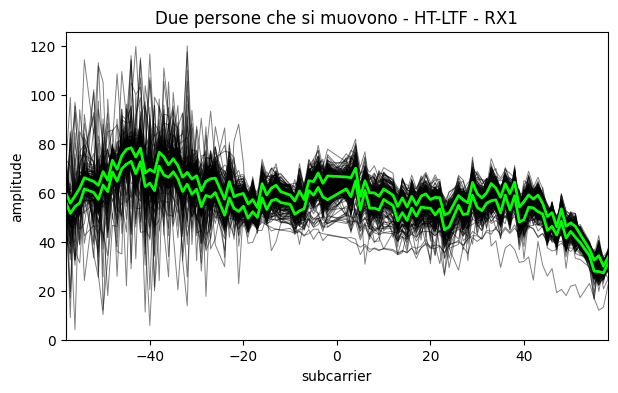

In [24]:
ax= plot_csi_bundle(bundles_due_movimento_htltf_rx1[2], subcarrier_idx=subcarriers_htltf, title='Due persone che si muovono - HT-LTF - RX1')

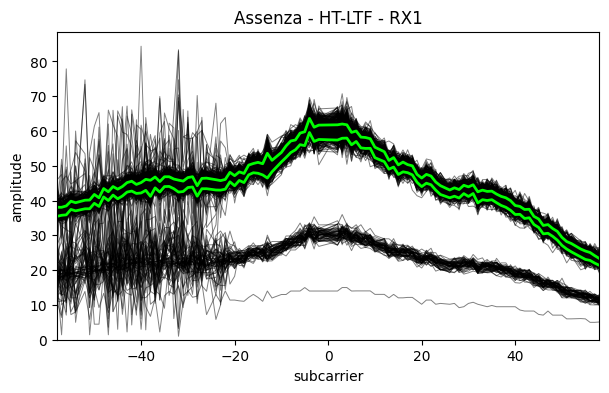

In [25]:
ax= plot_csi_bundle(bundles_assenza_htltf_rx1[200], subcarrier_idx=subcarriers_htltf, title='Assenza - HT-LTF - RX1')

In [26]:
def apply_hampel_to_bundle(bundle, window_size=5, n_sigma=3.0):
    # bundle shape: (n_packets, n_subcarriers)
    n_packets, n_subcarriers = bundle.shape
    filtered = np.zeros_like(bundle)
    for i in range(n_subcarriers):
        res = hampel(bundle[:, i], window_size=window_size, n_sigma=n_sigma)
        filtered[:, i] = res.filtered_data
    return filtered

In [ ]:
bundles_hampel_assenza_htltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx1]
bundles_hampel_assenza_htltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx2]

bundles_hampel_due_movimento_htltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx1]
bundles_hampel_due_movimento_htltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx2]

bundles_hampel_due_ferme_htltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx1]
bundles_hampel_due_ferme_htltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx2]

bundles_hampel_una_movimento_htltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx1]
bundles_hampel_una_movimento_htltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx2]

bundles_hampel_una_ferma_htltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx1]
bundles_hampel_una_ferma_htltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx2]

#LLTF 

bundles_hampel_assenzarx1_lltf = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx1]
bundles_hampel_assenzarx2_lltf = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx2]

bundles_hampel_due_movimento_lltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx1]
bundles_hampel_due_movimento_lltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx2]

bundles_hampel_due_ferme_lltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx1]
bundles_hampel_due_ferme_lltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx2]

bundles_hampel_una_movimento_lltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx1]
bundles_hampel_una_movimento_lltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx2]

bundles_hampel_una_ferma_lltf_rx1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx1]
bundles_hampel_una_ferma_lltf_rx2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx2]

In [28]:
def plot_csi_bundles_comparison_3d(bundle_raw, bundle_filtered, 
                                   title_raw="Raw CSI Bundle", 
                                   title_filtered="Filtered CSI Bundle",
                                   elev=30, azim=-60, cmap='viridis'):
    """
    Plotta a confronto due bundle CSI (raw e filtrato) in 3D affiancati.
    Ogni bundle: array shape (n_packets, n_subcarriers)
    """
    fig = plt.figure(figsize=(16, 6))
    
    # Primo subplot: raw
    ax1 = fig.add_subplot(121, projection='3d')
    X1, Y1 = np.meshgrid(np.arange(bundle_raw.shape[1]), np.arange(bundle_raw.shape[0]))
    surf1 = ax1.plot_surface(X1, Y1, bundle_raw, cmap=cmap, linewidth=0, antialiased=True)
    ax1.set_title(title_raw)
    ax1.set_xlabel('Subcarrier')
    ax1.set_ylabel('Packet')
    ax1.set_zlabel('|CSI| Amplitude')
    ax1.view_init(elev=elev, azim=azim)
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

    # Secondo subplot: filtered
    ax2 = fig.add_subplot(122, projection='3d')
    X2, Y2 = np.meshgrid(np.arange(bundle_filtered.shape[1]), np.arange(bundle_filtered.shape[0]))
    surf2 = ax2.plot_surface(X2, Y2, bundle_filtered, cmap=cmap, linewidth=0, antialiased=True)
    ax2.set_title(title_filtered)
    ax2.set_xlabel('Subcarrier')
    ax2.set_ylabel('Packet')
    ax2.set_zlabel('|CSI| Amplitude')
    ax2.view_init(elev=elev, azim=azim)
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

    plt.tight_layout()
    plt.show()

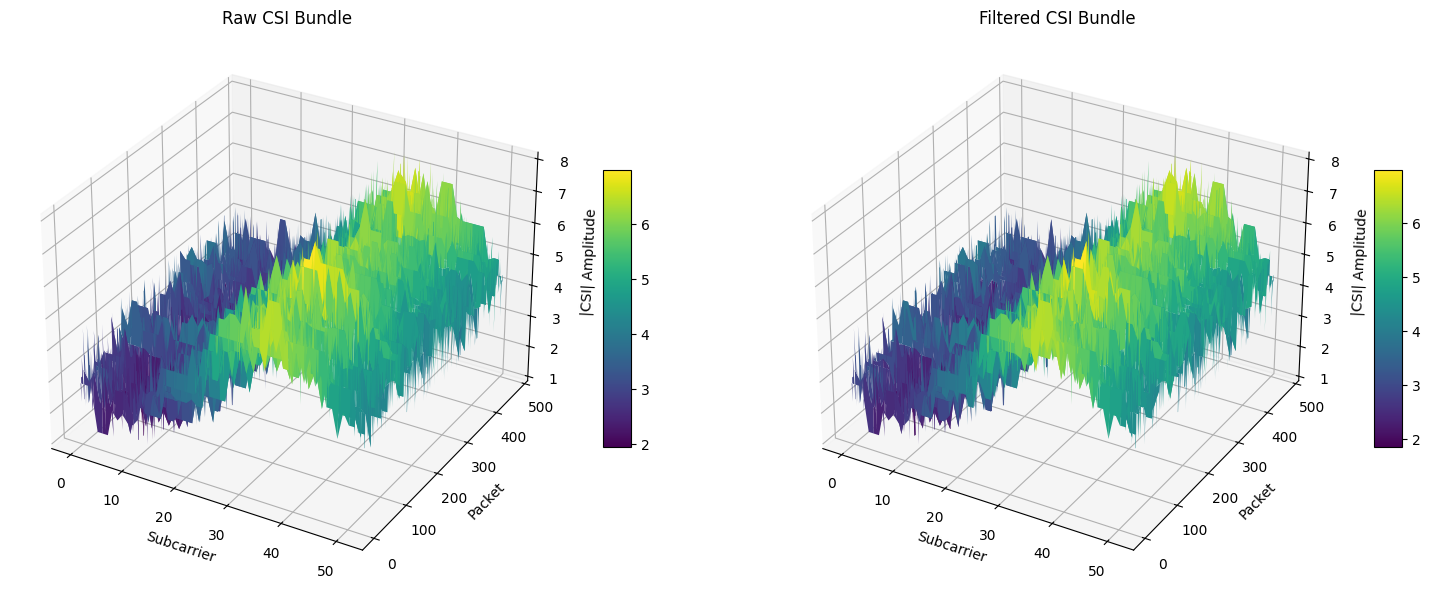

In [29]:
plot_csi_bundles_comparison_3d(bundles_due_ferme_lltf_rx2[10], bundles_hampel_due_ferme_lltf_rx2[10])

In [30]:
def apply_savgol_to_bundle(bundle, sg_window=11, sg_order=2):
    """
    Applica il filtro Savitzky-Golay a ciascun subcarrier di un bundle.
    bundle: array (n_packets, n_subcarriers)
    """
    bundle_savgol = np.zeros_like(bundle)
    n_packets = bundle.shape[0]
    for j in range(bundle.shape[1]):
        # Assicura che window_length sia dispari e non maggiore di n_packets
        win = min(sg_window, n_packets if n_packets % 2 == 1 else n_packets-1)
        if win < sg_order+2: win = sg_order+2 | 1  # almeno ordine+2, dispari
        bundle_savgol[:, j] = savgol_filter(bundle[:, j], window_length=win, polyorder=sg_order, mode='interp')
    return bundle_savgol


In [32]:
bundles_savgol_assenza_htltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_assenza_htltf_rx1]
bundles_savgol_assenza_htltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_assenza_htltf_rx2]

bundles_savgol_due_movimento_htltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_movimento_htltf_rx1]
bundles_savgol_due_movimento_htltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_movimento_htltf_rx2]

bundles_savgol_due_ferme_htltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_ferme_htltf_rx1]
bundles_savgol_due_ferme_htltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_ferme_htltf_rx2]

bundles_savgol_una_movimento_htltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_movimento_htltf_rx1]
bundles_savgol_una_movimento_htltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_movimento_htltf_rx2]

bundles_savgol_una_ferma_htltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_ferma_htltf_rx1]
bundles_savgol_una_ferma_htltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_ferma_htltf_rx2]


bundles_savgol_assenzarx1_lltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_assenzarx1_lltf]
bundles_savgol_assenzarx2_lltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_assenzarx2_lltf]

bundles_savgol_due_movimento_lltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_movimento_lltf_rx1]
bundles_savgol_due_movimento_lltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_movimento_lltf_rx2]

bundles_savgol_due_ferme_lltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_ferme_lltf_rx1]
bundles_savgol_due_ferme_lltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_due_ferme_lltf_rx2]

bundles_savgol_una_movimento_lltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_movimento_lltf_rx1]
bundles_savgol_una_movimento_lltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_movimento_lltf_rx2]

bundles_savgol_una_ferma_lltf_rx1 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_ferma_lltf_rx1]
bundles_savgol_una_ferma_lltf_rx2 = [apply_savgol_to_bundle(b) for b in bundles_hampel_una_ferma_lltf_rx2]


In [33]:
def plot_all_csi_bundles_comparison_3d_triple(
        bundles_raw, bundles_hampel, bundles_savgol, 
        elev=30, azim=-60, cmap='viridis', 
        max_to_plot=5):
    """
    Visualizza affiancati tutti i bundle raw, hampel e hampel+savgol (fino a max_to_plot).
    Ogni bundle: array shape (n_packets, n_subcarriers)
    """
    n = min(len(bundles_raw), len(bundles_hampel), len(bundles_savgol), max_to_plot)
    fig = plt.figure(figsize=(18, 4 * n))
    for i in range(n):
        # RAW
        ax1 = fig.add_subplot(n, 3, 3*i+1, projection='3d')
        X1, Y1 = np.meshgrid(np.arange(bundles_raw[i].shape[1]), np.arange(bundles_raw[i].shape[0]))
        ax1.plot_surface(X1, Y1, bundles_raw[i], cmap=cmap, linewidth=0, antialiased=True)
        ax1.set_title(f'Raw Bundle {i}')
        ax1.set_xlabel('Subcarrier')
        ax1.set_ylabel('Packet')
        ax1.set_zlabel('|CSI|')
        ax1.view_init(elev=elev, azim=azim)

        # HAMPEL
        ax2 = fig.add_subplot(n, 3, 3*i+2, projection='3d')
        X2, Y2 = np.meshgrid(np.arange(bundles_hampel[i].shape[1]), np.arange(bundles_hampel[i].shape[0]))
        ax2.plot_surface(X2, Y2, bundles_hampel[i], cmap=cmap, linewidth=0, antialiased=True)
        ax2.set_title(f'Hampel Bundle {i}')
        ax2.set_xlabel('Subcarrier')
        ax2.set_ylabel('Packet')
        ax2.set_zlabel('|CSI|')
        ax2.view_init(elev=elev, azim=azim)

        # HAMPEL + SAVITZKY-GOLAY
        ax3 = fig.add_subplot(n, 3, 3*i+3, projection='3d')
        X3, Y3 = np.meshgrid(np.arange(bundles_savgol[i].shape[1]), np.arange(bundles_savgol[i].shape[0]))
        ax3.plot_surface(X3, Y3, bundles_savgol[i], cmap=cmap, linewidth=0, antialiased=True)
        ax3.set_title(f'Hampel + SavGol Bundle {i}')
        ax3.set_xlabel('Subcarrier')
        ax3.set_ylabel('Packet')
        ax3.set_zlabel('|CSI|')
        ax3.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()

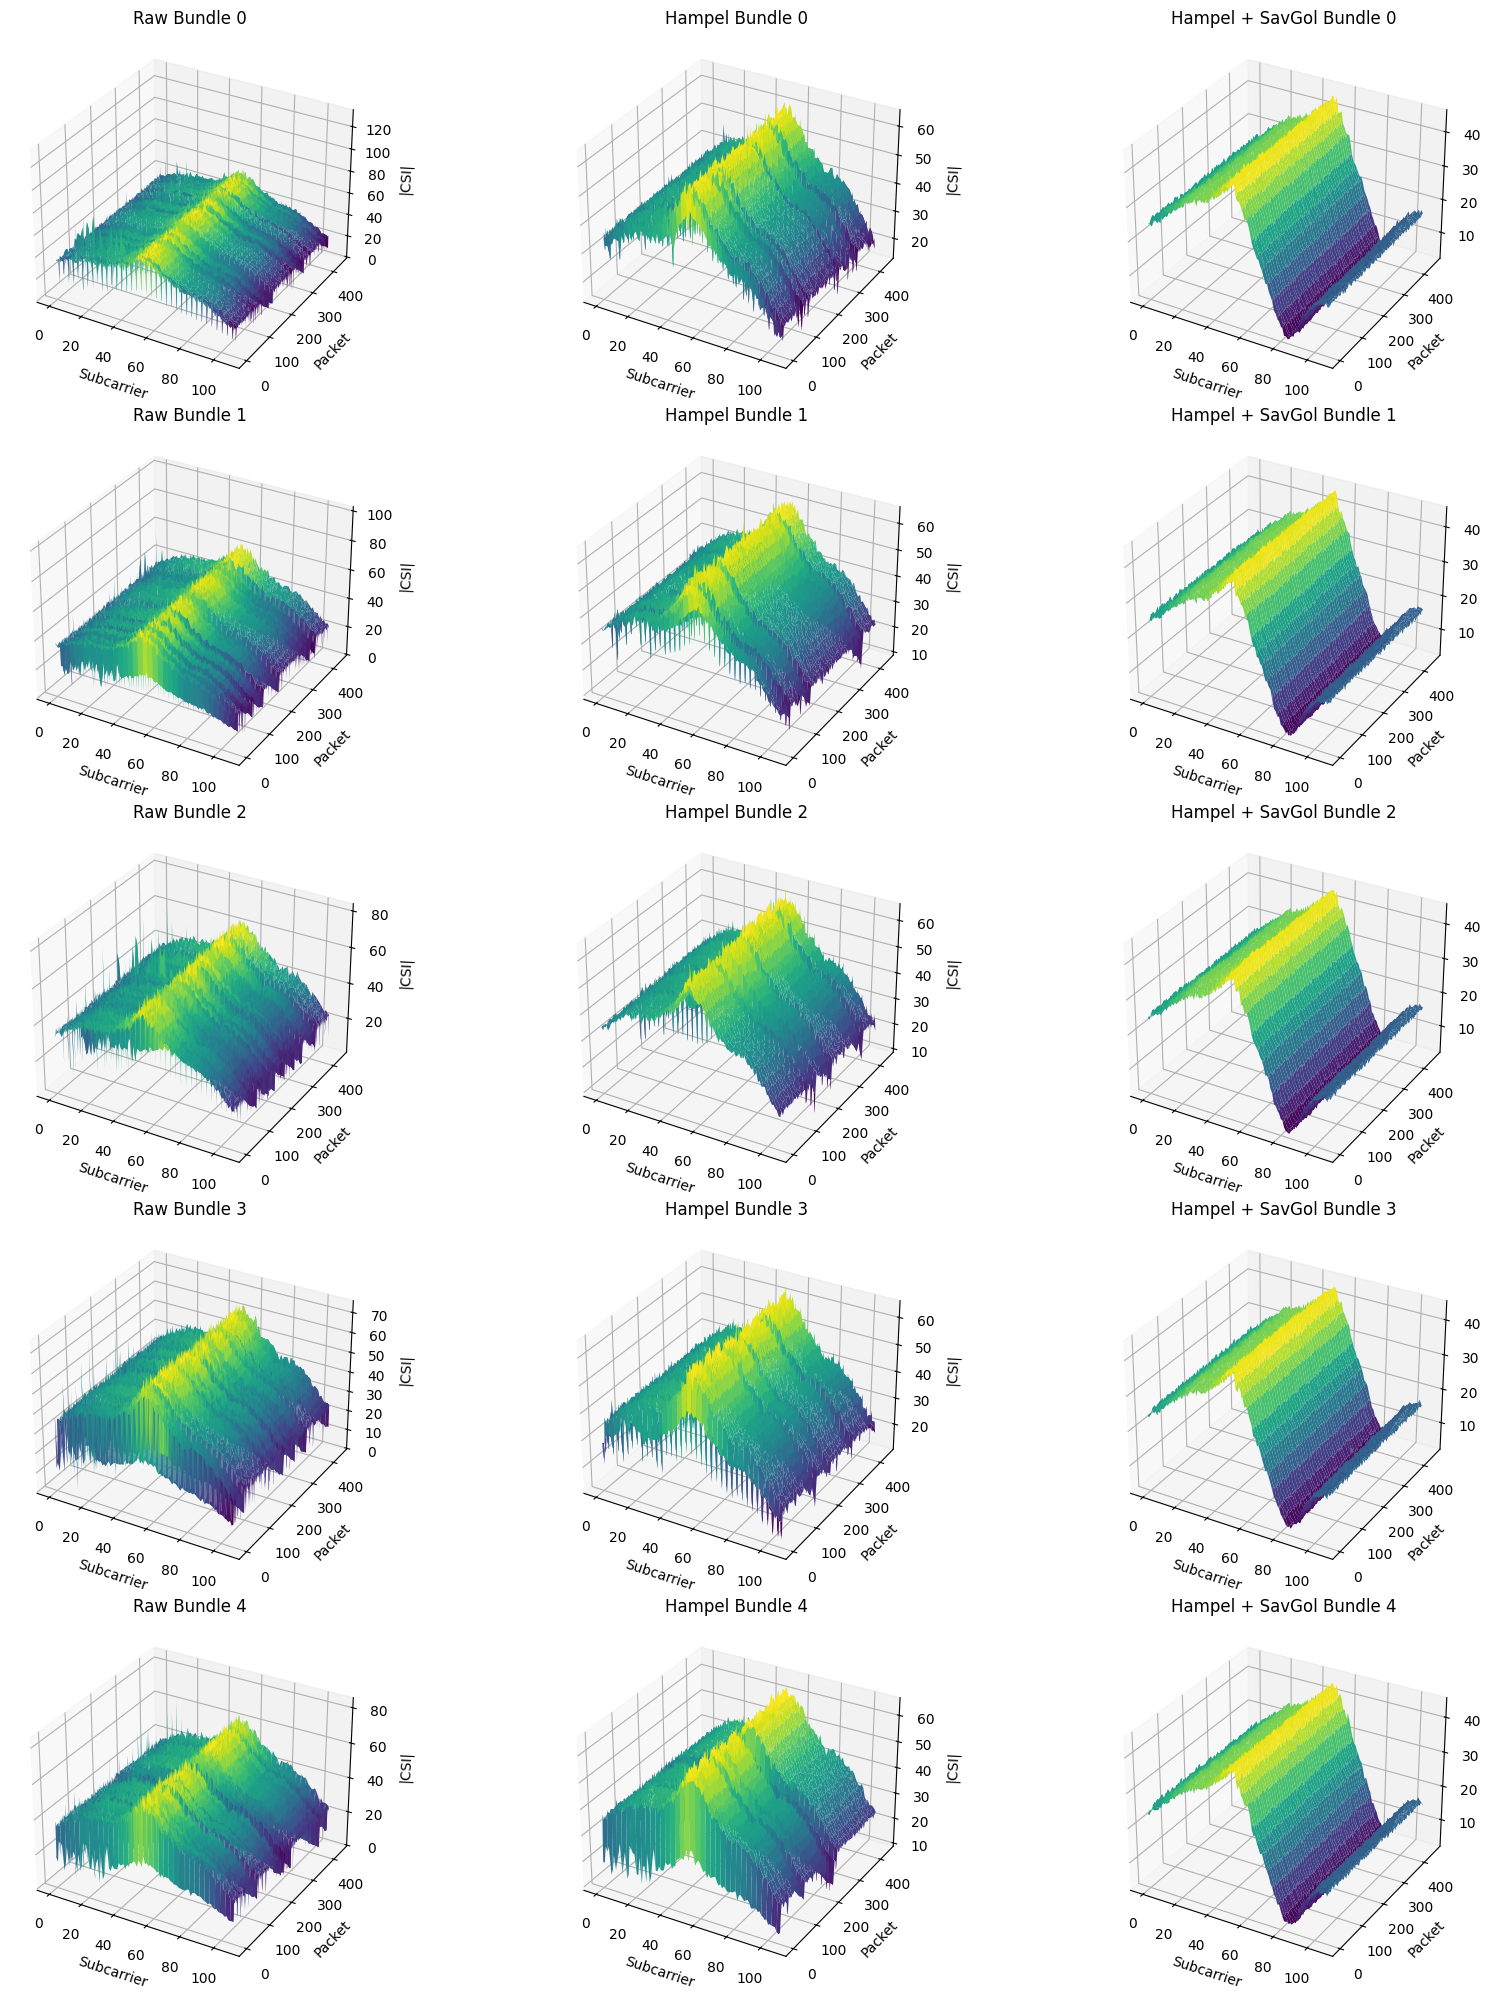

In [35]:
plot_all_csi_bundles_comparison_3d_triple(
    bundles_assenza_htltf_rx1,
    bundles_savgol_assenza_htltf_rx1,
    bundles_savgol_assenza_htltf_rx2
)

In [36]:
def plot_all_csi_bundles_comparison_2d(
        bundles_raw, bundles_hampel, bundles_savgol, 
        subcarrier=0, max_to_plot=5):
    """
    Visualizza in 2D (lineplot) le tracce temporali di un subcarrier per raw, hampel, hampel+savgol.
    Ogni plot: asse x = pacchetto, asse y = |CSI|
    """
    n = min(len(bundles_raw), len(bundles_hampel), len(bundles_savgol), max_to_plot)
    plt.figure(figsize=(10, 3 * n))
    for i in range(n):
        plt.subplot(n, 1, i+1)
        plt.plot(bundles_raw[i][:, subcarrier], label='Raw', color='C0', alpha=0.7)
        plt.plot(bundles_hampel[i][:, subcarrier], label='Hampel', color='C1', alpha=0.7)
        plt.plot(bundles_savgol[i][:, subcarrier], label='Hampel + SavGol', color='C2', alpha=0.7)
        plt.title(f'Bundle {i} - Subcarrier {subcarrier}')
        plt.xlabel('Packet Index')
        plt.ylabel('|CSI|')
        plt.legend()
        plt.tight_layout()
    plt.show()

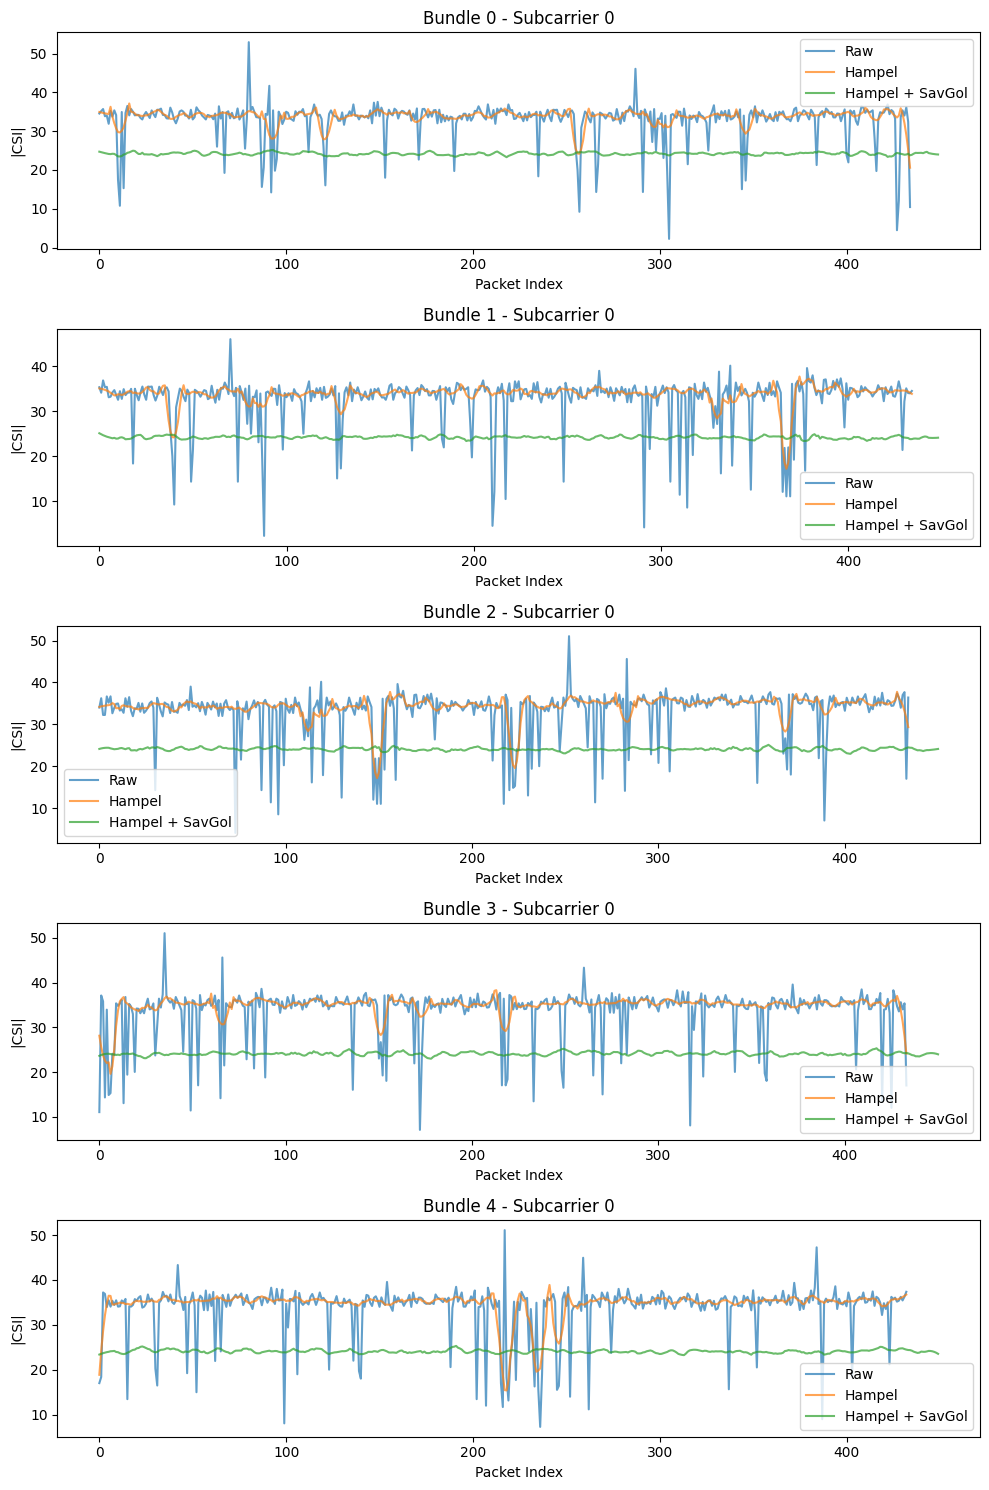

In [38]:
plot_all_csi_bundles_comparison_2d(   bundles_assenza_htltf_rx1,
    bundles_savgol_assenza_htltf_rx1,
    bundles_savgol_assenza_htltf_rx2, subcarrier=0, max_to_plot=5)

In [39]:
def extract_features_per_subcarrier(csi_matrix):
    """
    csi_matrix: array (N_win, N_subcarriers)
    Output: dict con feature vettoriali (shape (N_win, N_subcarriers))

    """
    feats = {}
    
    feats["std"] = np.std(csi_matrix, axis=0)   # per subcarrier, quindi nella prima finestra calcolo la deviazine su tutta la finestra e cosi via
    feats["min"] = np.min(csi_matrix, axis=0)
    feats["max"] = np.max(csi_matrix, axis=0)
    feats["avg"] = np.mean(csi_matrix, axis=0)
    feats["qtl"] = np.percentile(csi_matrix, 25, axis=0)
    feats["qtu"] = np.percentile(csi_matrix, 75, axis=0)
    feats["iqr"] = feats["qtu"] - feats["qtl"]
    
    return feats


In [40]:
def extract_adj_feature_all_windows(csi_windows, N=2):
    """
    Calcola la feature 'adj' per ciascuna finestra CSI (come nel paper Wi-CaL).
    
    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)
    N : int
        Numero di sottocarrier adiacenti da considerare su ciascun lato

    Ritorna
    -------
    adj_all : list of np.ndarray
        Lista di vettori (uno per finestra), ciascuno lungo (N_subcarriers - 2*N)
    """
    adj_all = []
    for w, csi_matrix in enumerate(csi_windows):
        n_pkt, n_subc = csi_matrix.shape
        adj_values = []

        for j in range(N, n_subc - N):  # evitiamo i bordi
            xi_j = np.zeros(n_pkt)
            for n in range(1, N + 1):
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j - n])
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j + n])
            mu_j = np.mean(xi_j)
            adj_values.append(mu_j)

        adj_all.append(np.array(adj_values))
    return adj_all


In [41]:
def extract_euc_feature_all_windows(csi_windows):
    """
    Calcola la feature 'euc' (Euclidean distance tra pacchetti consecutivi)
    per ciascuna finestra CSI, come da paper Wi-CaL.

    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)

    Ritorna
    -------
    euc_all : list of float
        Lista di valori 'euc', uno per finestra
    """
    euc_all = []

    for w, csi_matrix in enumerate(csi_windows):
        if csi_matrix.shape[0] < 2:
            euc_all.append(np.nan)  # finestra troppo corta, eviti errore
            continue

        # Differenze tra pacchetti consecutivi
        diffs = np.diff(csi_matrix, axis=0)            # shape (N_pkt-1, N_subcarriers)
        norms = np.linalg.norm(diffs, axis=1)          # distanza euclidea per ogni coppia
        euc_val = np.median(norms)                     # mediana come nel paper

        euc_all.append(euc_val)

    return np.array(euc_all)


In [42]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore LLTF
adj_assenza_lltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_assenzarx1_lltf_rx1, N=2)
df_adj_assenza_lltf_rx1 = pd.DataFrame(adj_assenza_lltf_rx1)
assenza_adj_lltf_rx1 = df_adj_assenza_lltf_rx1.values.tolist()
adj_assenza_lltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_assenzarx2_lltf_rx2, N=2)
df_adj_assenza_lltf_rx2 = pd.DataFrame(adj_assenza_lltf_rx2)
assenza_adj_lltf_rx2 = df_adj_assenza_lltf_rx2.values.tolist()

adj_due_movimento_lltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1, N=2)
df_adj_due_movimento_lltf_rx1 = pd.DataFrame(adj_due_movimento_lltf_rx1)
due_movimento_adj_lltf_rx1 = df_adj_due_movimento_lltf_rx1.values.tolist()
adj_due_movimento_lltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2, N=2)
df_adj_due_movimento_lltf_rx2 = pd.DataFrame(adj_due_movimento_lltf_rx2)
due_movimento_adj_lltf_rx2 = df_adj_due_movimento_lltf_rx2.values.tolist()

adj_due_ferme_lltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1, N=2)
df_adj_due_ferme_lltf_rx1 = pd.DataFrame(adj_due_ferme_lltf_rx1)
due_ferme_adj_lltf_rx1 = df_adj_due_ferme_lltf_rx1.values.tolist()
adj_due_ferme_lltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2, N=2)
df_adj_due_ferme_lltf_rx2 = pd.DataFrame(adj_due_ferme_lltf_rx2)
due_ferme_adj_lltf_rx2 = df_adj_due_ferme_lltf_rx2.values.tolist()

adj_una_movimento_lltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1, N=2)
df_adj_una_movimento_lltf_rx1 = pd.DataFrame(adj_una_movimento_lltf_rx1)
una_movimento_adj_lltf_rx1 = df_adj_una_movimento_lltf_rx1.values.tolist()
adj_una_movimento_lltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2, N=2)
df_adj_una_movimento_lltf_rx2 = pd.DataFrame(adj_una_movimento_lltf_rx2)
una_movimento_adj_lltf_rx2 = df_adj_una_movimento_lltf_rx2.values.tolist()

adj_una_ferma_lltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1, N=2)
df_adj_una_ferma_lltf_rx1 = pd.DataFrame(adj_una_ferma_lltf_rx1)
una_ferma_adj_lltf_rx1 = df_adj_una_ferma_lltf_rx1.values.tolist()
adj_una_ferma_lltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2, N=2)
df_adj_una_ferma_lltf_rx2 = pd.DataFrame(adj_una_ferma_lltf_rx2)
una_ferma_adj_lltf_rx2 = df_adj_una_ferma_lltf_rx2.values.tolist()



In [43]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore htltf
adj_assenza_htltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_assenza_htltf_rx1, N=2)
df_adj_assenza_htltf_rx1 = pd.DataFrame(adj_assenza_htltf_rx1)
assenza_adj_htltf_rx1 = df_adj_assenza_htltf_rx1.values.tolist()
adj_assenza_htltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_assenza_htltf_rx2, N=2)
df_adj_assenza_htltf_rx2 = pd.DataFrame(adj_assenza_htltf_rx2)
assenza_adj_htltf_rx2 = df_adj_assenza_htltf_rx2.values.tolist()

adj_due_movimento_htltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_htltf_rx1, N=2)
df_adj_due_movimento_htltf_rx1 = pd.DataFrame(adj_due_movimento_htltf_rx1)
due_movimento_adj_htltf_rx1 = df_adj_due_movimento_htltf_rx1.values.tolist()
adj_due_movimento_htltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_htltf_rx2, N=2)
df_adj_due_movimento_htltf_rx2 = pd.DataFrame(adj_due_movimento_htltf_rx2)
due_movimento_adj_htltf_rx2 = df_adj_due_movimento_htltf_rx2.values.tolist()

adj_due_ferme_htltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_htltf_rx1, N=2)
df_adj_due_ferme_htltf_rx1 = pd.DataFrame(adj_due_ferme_htltf_rx1)
due_ferme_adj_htltf_rx1 = df_adj_due_ferme_htltf_rx1.values.tolist()
adj_due_ferme_htltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_htltf_rx2, N=2)
df_adj_due_ferme_htltf_rx2 = pd.DataFrame(adj_due_ferme_htltf_rx2)
due_ferme_adj_htltf_rx2 = df_adj_due_ferme_htltf_rx2.values.tolist()

adj_una_movimento_htltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_htltf_rx1, N=2)
df_adj_una_movimento_htltf_rx1 = pd.DataFrame(adj_una_movimento_htltf_rx1)
una_movimento_adj_htltf_rx1 = df_adj_una_movimento_htltf_rx1.values.tolist()
adj_una_movimento_htltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_htltf_rx2, N=2)
df_adj_una_movimento_htltf_rx2 = pd.DataFrame(adj_una_movimento_htltf_rx2)
una_movimento_adj_htltf_rx2 = df_adj_una_movimento_htltf_rx2.values.tolist()

adj_una_ferma_htltf_rx1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_htltf_rx1, N=2)
df_adj_una_ferma_htltf_rx1 = pd.DataFrame(adj_una_ferma_htltf_rx1)
una_ferma_adj_htltf_rx1 = df_adj_una_ferma_htltf_rx1.values.tolist()
adj_una_ferma_htltf_rx2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_htltf_rx2, N=2)
df_adj_una_ferma_htltf_rx2 = pd.DataFrame(adj_una_ferma_htltf_rx2)
una_ferma_adj_htltf_rx2 = df_adj_una_ferma_htltf_rx2.values.tolist()


In [44]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore LLTF
euc_assenza_lltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_assenzarx1_lltf_rx1)
df_euc_assenza_lltf_rx1 = pd.DataFrame(euc_assenza_lltf_rx1)
euc_assenza_lltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_assenzarx2_lltf_rx2)
df_euc_assenza_lltf_rx2 = pd.DataFrame(euc_assenza_lltf_rx2)

euc_due_movimento_lltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1)
df_euc_due_movimento_lltf_rx1 = pd.DataFrame(euc_due_movimento_lltf_rx1)
euc_due_movimento_lltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2)
df_euc_due_movimento_lltf_rx2 = pd.DataFrame(euc_due_movimento_lltf_rx2)

euc_due_ferme_lltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1)
df_euc_due_ferme_lltf_rx1 = pd.DataFrame(euc_due_ferme_lltf_rx1)
euc_due_ferme_lltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2)
df_euc_due_ferme_lltf_rx2 = pd.DataFrame(euc_due_ferme_lltf_rx2)

euc_una_movimento_lltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1)
df_euc_una_movimento_lltf_rx1 = pd.DataFrame(euc_una_movimento_lltf_rx1)
euc_una_movimento_lltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2)
df_euc_una_movimento_lltf_rx2 = pd.DataFrame(euc_una_movimento_lltf_rx2)

euc_una_ferma_lltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1)
df_euc_una_ferma_lltf_rx1 = pd.DataFrame(euc_una_ferma_lltf_rx1)
euc_una_ferma_lltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2)
df_euc_una_ferma_lltf_rx2 = pd.DataFrame(euc_una_ferma_lltf_rx2)

In [45]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore htltf
euc_assenza_htltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_assenza_htltf_rx1)
df_euc_assenza_htltf_rx1 = pd.DataFrame(euc_assenza_htltf_rx1)
euc_assenza_htltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_assenza_htltf_rx2)
df_euc_assenza_htltf_rx2 = pd.DataFrame(euc_assenza_htltf_rx2)

euc_due_movimento_htltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_htltf_rx1)
df_euc_due_movimento_htltf_rx1 = pd.DataFrame(euc_due_movimento_htltf_rx1)
euc_due_movimento_htltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_htltf_rx2)
df_euc_due_movimento_htltf_rx2 = pd.DataFrame(euc_due_movimento_htltf_rx2)

euc_due_ferme_htltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_htltf_rx1)
df_euc_due_ferme_htltf_rx1 = pd.DataFrame(euc_due_ferme_htltf_rx1)
euc_due_ferme_htltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_htltf_rx2)
df_euc_due_ferme_htltf_rx2 = pd.DataFrame(euc_due_ferme_htltf_rx2)

euc_una_movimento_htltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_htltf_rx1)
df_euc_una_movimento_htltf_rx1 = pd.DataFrame(euc_una_movimento_htltf_rx1)
euc_una_movimento_htltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_htltf_rx2)
df_euc_una_movimento_htltf_rx2 = pd.DataFrame(euc_una_movimento_htltf_rx2)

euc_una_ferma_htltf_rx1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_htltf_rx1)
df_euc_una_ferma_htltf_rx1 = pd.DataFrame(euc_una_ferma_htltf_rx1)
euc_una_ferma_htltf_rx2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_htltf_rx2)
df_euc_una_ferma_htltf_rx2 = pd.DataFrame(euc_una_ferma_htltf_rx2)

In [46]:
# calcolo prima le feature come std, min, max, avg etc LLTF

features_assenza_lltf_rx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenzarx1_lltf_rx1]
df_features_assenza_lltf_rx1 = pd.DataFrame(features_assenza_lltf_rx1)
df_features_assenza_lltf_rx1["adj"] = assenza_adj_lltf_rx1
features_assenza_lltf_rx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenzarx2_lltf_rx2]
df_features_assenza_lltf_rx2 = pd.DataFrame(features_assenza_lltf_rx2)
df_features_assenza_lltf_rx2["adj"] = assenza_adj_lltf_rx2

features_unapersonafermarx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx1]
df_features_una_ferma_lltf_rx1 = pd.DataFrame(features_unapersonafermarx1)
df_features_una_ferma_lltf_rx1["adj"] = una_ferma_adj_lltf_rx1
features_unapersonafermarx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx2]
df_features_una_ferma_lltf_rx2 = pd.DataFrame(features_unapersonafermarx2)
df_features_una_ferma_lltf_rx2["adj"] = una_ferma_adj_lltf_rx2

features_unapersonachesimuoverx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx1]
df_features_una_movimento_lltf_rx1 = pd.DataFrame(features_unapersonachesimuoverx1)
df_features_una_movimento_lltf_rx1["adj"] = una_movimento_adj_lltf_rx1
features_unapersonachesimuoverx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx2]
df_features_una_movimento_lltf_rx2 = pd.DataFrame(features_unapersonachesimuoverx2)
df_features_una_movimento_lltf_rx2["adj"] = una_movimento_adj_lltf_rx2

features_duepersonefermarx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx1]
df_features_due_ferme_lltf_rx1 = pd.DataFrame(features_duepersonefermarx1)
df_features_due_ferme_lltf_rx1["adj"] = due_ferme_adj_lltf_rx1
features_duepersonefermarx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx2]
df_features_due_ferme_lltf_rx2 = pd.DataFrame(features_duepersonefermarx2)
df_features_due_ferme_lltf_rx2["adj"] = due_ferme_adj_lltf_rx2

features_duepersonechesimuovonorx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx1]
df_features_due_movimento_lltf_rx1 = pd.DataFrame(features_duepersonechesimuovonorx1)
df_features_due_movimento_lltf_rx1["adj"] = due_movimento_adj_lltf_rx1
features_duepersonechesimuovonorx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx2]
df_features_due_movimento_lltf_rx2 = pd.DataFrame(features_duepersonechesimuovonorx2)
df_features_due_movimento_lltf_rx2["adj"] = due_movimento_adj_lltf_rx2


In [47]:
# calcolo prima le feature come std, min, max, avg etc HTLTF

features_assenza_htltf_rx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_htltf_rx1]
df_features_assenza_htltf_rx1 = pd.DataFrame(features_assenza_htltf_rx1)
df_features_assenza_htltf_rx1["adj"] = assenza_adj_htltf_rx1 # adj viene calcolata in maniera diversa per questo in questa fase la aggiungo manualmente
features_assenza_htltf_rx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_htltf_rx2]
df_features_assenza_htltf_rx2 = pd.DataFrame(features_assenza_htltf_rx2)
df_features_assenza_htltf_rx2["adj"] = assenza_adj_htltf_rx2

features_unapersonafermarx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_htltf_rx1]
df_features_una_ferma_htltf_rx1 = pd.DataFrame(features_unapersonafermarx1)
df_features_una_ferma_htltf_rx1["adj"] = una_ferma_adj_htltf_rx1
features_unapersonafermarx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_htltf_rx2]
df_features_una_ferma_htltf_rx2 = pd.DataFrame(features_unapersonafermarx2)
df_features_una_ferma_htltf_rx2["adj"] = una_ferma_adj_htltf_rx2

features_unapersonachesimuoverx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_htltf_rx1]
df_features_una_movimento_htltf_rx1 = pd.DataFrame(features_unapersonachesimuoverx1)
df_features_una_movimento_htltf_rx1["adj"] = una_movimento_adj_htltf_rx1
features_unapersonachesimuoverx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_htltf_rx2]
df_features_una_movimento_htltf_rx2 = pd.DataFrame(features_unapersonachesimuoverx2)
df_features_una_movimento_htltf_rx2["adj"] = una_movimento_adj_htltf_rx2

features_duepersonefermarx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_htltf_rx1]
df_features_due_ferme_htltf_rx1 = pd.DataFrame(features_duepersonefermarx1)
df_features_due_ferme_htltf_rx1["adj"] = due_ferme_adj_htltf_rx1
features_duepersonefermarx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_htltf_rx2]
df_features_due_ferme_htltf_rx2 = pd.DataFrame(features_duepersonefermarx2)
df_features_due_ferme_htltf_rx2["adj"] = due_ferme_adj_htltf_rx2

features_duepersonechesimuovonorx1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_htltf_rx1]
df_features_due_movimento_htltf_rx1 = pd.DataFrame(features_duepersonechesimuovonorx1)
df_features_due_movimento_htltf_rx1["adj"] = due_movimento_adj_htltf_rx1
features_duepersonechesimuovonorx2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_htltf_rx2]
df_features_due_movimento_htltf_rx2 = pd.DataFrame(features_duepersonechesimuovonorx2)
df_features_due_movimento_htltf_rx2["adj"] = due_movimento_adj_htltf_rx2


In [48]:
std_values = np.array([f["std"] for f in features_assenza_htltf_rx1])
print("Forma:", std_values.shape)
print("lunghezza bundle:", len(bundles_assenza_htltf_rx1))
print("lunghezza singolo valore di std, sarebbe std^(w): ", len(std_values[1]))
print("Valori della colonna std", std_values) #compone la prima colonna della matrice, questo è link 1 quindi kw=1


Forma: (242, 108)
lunghezza bundle: 242
lunghezza singolo valore di std, sarebbe std^(w):  108
Valori della colonna std [[1.81871844 1.89946652 1.71386634 ... 2.10552532 1.95758225 1.80005862]
 [2.19289968 1.87882642 2.37057774 ... 2.02283902 2.09745763 1.92628203]
 [2.59811543 2.1420826  2.57196841 ... 1.84313755 2.10539734 2.11535977]
 ...
 [2.57308313 2.14225897 2.57141955 ... 1.96990508 1.9320304  1.91548491]
 [2.86837674 2.34220282 2.74380655 ... 2.18145886 2.22302207 2.06644544]
 [3.63185125 3.20508303 3.4905678  ... 2.69091041 2.61555238 2.44885271]]


In [49]:
def build_two_feature_matrix(df1, col1, df2, col2):
    """
    df1, df2: DataFrame con le feature
    col1: nome colonna da prendere da df1
    col2: nome colonna da prendere da df2
    
    Ritorna: DataFrame con 2 colonne, tagliato alla lunghezza minima
    """
    min_len = min(len(df1), len(df2))
    
    col_a = df1[col1].iloc[:min_len].reset_index(drop=True).rename(f"{col1}_1")
    col_b = df2[col2].iloc[:min_len].reset_index(drop=True).rename(f"{col2}_2")
    
    return pd.concat([col_a, col_b], axis=1)

In [50]:
matrice_min_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "min", df_features_assenza_htltf_rx2, "min")
matrice_max_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "max", df_features_assenza_htltf_rx2, "max")
matrice_qtl_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "qtl", df_features_assenza_htltf_rx2, "qtl")
matrice_qtu_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "qtu", df_features_assenza_htltf_rx2, "qtu")
matrice_avg_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "avg", df_features_assenza_htltf_rx2, "avg")   
matrice_iqr_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "iqr", df_features_assenza_htltf_rx2, "iqr")
matrice_std_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "std", df_features_assenza_htltf_rx2, "std")
matrice_adj_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1, "adj", df_features_assenza_htltf_rx2, "adj")

matrice_min_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "min", df_features_una_ferma_htltf_rx2, "min")
matrice_max_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "max", df_features_una_ferma_htltf_rx2, "max")
matrice_qtl_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "qtl", df_features_una_ferma_htltf_rx2, "qtl")
matrice_qtu_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "qtu", df_features_una_ferma_htltf_rx2, "qtu")
matrice_avg_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "avg", df_features_una_ferma_htltf_rx2, "avg")   
matrice_iqr_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "iqr", df_features_una_ferma_htltf_rx2, "iqr")
matrice_std_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "std", df_features_una_ferma_htltf_rx2, "std")
matrice_adj_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1, "adj", df_features_una_ferma_htltf_rx2, "adj")

matrice_min_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "min", df_features_una_movimento_htltf_rx2, "min")
matrice_max_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "max", df_features_una_movimento_htltf_rx2, "max")
matrice_qtl_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "qtl", df_features_una_movimento_htltf_rx2, "qtl")
matrice_qtu_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "qtu", df_features_una_movimento_htltf_rx2, "qtu")
matrice_avg_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "avg", df_features_una_movimento_htltf_rx2, "avg")   
matrice_iqr_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "iqr", df_features_una_movimento_htltf_rx2, "iqr")
matrice_std_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "std", df_features_una_movimento_htltf_rx2, "std")
matrice_adj_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1, "adj", df_features_una_movimento_htltf_rx2, "adj")

matrice_min_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "min", df_features_due_movimento_htltf_rx2, "min")
matrice_max_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "max", df_features_due_movimento_htltf_rx2, "max")
matrice_qtl_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "qtl", df_features_due_movimento_htltf_rx2, "qtl")
matrice_qtu_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "qtu", df_features_due_movimento_htltf_rx2, "qtu")
matrice_avg_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "avg", df_features_due_movimento_htltf_rx2, "avg")   
matrice_iqr_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "iqr", df_features_due_movimento_htltf_rx2, "iqr")
matrice_std_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "std", df_features_due_movimento_htltf_rx2, "std")
matrice_adj_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1, "adj", df_features_due_movimento_htltf_rx2, "adj")

matrice_min_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "min", df_features_due_ferme_htltf_rx2, "min")
matrice_max_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "max", df_features_due_ferme_htltf_rx2, "max")
matrice_qtl_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "qtl", df_features_due_ferme_htltf_rx2, "qtl")
matrice_qtu_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "qtu", df_features_due_ferme_htltf_rx2, "qtu")
matrice_avg_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "avg", df_features_due_ferme_htltf_rx2, "avg")   
matrice_iqr_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "iqr", df_features_due_ferme_htltf_rx2, "iqr")
matrice_std_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "std", df_features_due_ferme_htltf_rx2, "std")
matrice_adj_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1, "adj", df_features_due_ferme_htltf_rx2, "adj")

In [51]:
matrice_min_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "min", df_features_assenza_lltf_rx2, "min")
matrice_max_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "max", df_features_assenza_lltf_rx2, "max")
matrice_qtl_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "qtl", df_features_assenza_lltf_rx2, "qtl")
matrice_qtu_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "qtu", df_features_assenza_lltf_rx2, "qtu")
matrice_avg_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "avg", df_features_assenza_lltf_rx2, "avg")   
matrice_iqr_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "iqr", df_features_assenza_lltf_rx2, "iqr")
matrice_std_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "std", df_features_assenza_lltf_rx2, "std")
matrice_adj_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1, "adj", df_features_assenza_lltf_rx2, "adj")

matrice_min_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "min", df_features_una_ferma_lltf_rx2, "min")
matrice_max_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "max", df_features_una_ferma_lltf_rx2, "max")
matrice_qtl_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "qtl", df_features_una_ferma_lltf_rx2, "qtl")
matrice_qtu_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "qtu", df_features_una_ferma_lltf_rx2, "qtu")
matrice_avg_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "avg", df_features_una_ferma_lltf_rx2, "avg")   
matrice_iqr_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "iqr", df_features_una_ferma_lltf_rx2, "iqr")
matrice_std_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "std", df_features_una_ferma_lltf_rx2, "std")
matrice_adj_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1, "adj", df_features_una_ferma_lltf_rx2, "adj")

matrice_min_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "min", df_features_una_movimento_lltf_rx2, "min")
matrice_max_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "max", df_features_una_movimento_lltf_rx2, "max")
matrice_qtl_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "qtl", df_features_una_movimento_lltf_rx2, "qtl")
matrice_qtu_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "qtu", df_features_una_movimento_lltf_rx2, "qtu")
matrice_avg_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "avg", df_features_una_movimento_lltf_rx2, "avg")   
matrice_iqr_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "iqr", df_features_una_movimento_lltf_rx2, "iqr")
matrice_std_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "std", df_features_una_movimento_lltf_rx2, "std")
matrice_adj_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1, "adj", df_features_una_movimento_lltf_rx2, "adj")

matrice_min_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "min", df_features_due_movimento_lltf_rx2, "min")
matrice_max_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "max", df_features_due_movimento_lltf_rx2, "max")
matrice_qtl_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "qtl", df_features_due_movimento_lltf_rx2, "qtl")
matrice_qtu_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "qtu", df_features_due_movimento_lltf_rx2, "qtu")
matrice_avg_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "avg", df_features_due_movimento_lltf_rx2, "avg")   
matrice_iqr_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "iqr", df_features_due_movimento_lltf_rx2, "iqr")
matrice_std_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "std", df_features_due_movimento_lltf_rx2, "std")
matrice_adj_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1, "adj", df_features_due_movimento_lltf_rx2, "adj")

matrice_min_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "min", df_features_due_ferme_lltf_rx2, "min")
matrice_max_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "max", df_features_due_ferme_lltf_rx2, "max")
matrice_qtl_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "qtl", df_features_due_ferme_lltf_rx2, "qtl")
matrice_qtu_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "qtu", df_features_due_ferme_lltf_rx2, "qtu")
matrice_avg_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "avg", df_features_due_ferme_lltf_rx2, "avg")   
matrice_iqr_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "iqr", df_features_due_ferme_lltf_rx2, "iqr")
matrice_std_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "std", df_features_due_ferme_lltf_rx2, "std")
matrice_adj_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1, "adj", df_features_due_ferme_lltf_rx2, "adj")


In [52]:
def rename_and_concat(df1, df2, suffix1="_link1", suffix2="_link2"):
    """
    Rinomina le colonne dei dataset aggiungendo un suffisso
    e concatena i due dataset orizzontalmente prendendo il minimo numero di righe.

    Parametri
    ---------
    df1 : pd.DataFrame
        Primo dataset.
    df2 : pd.DataFrame
        Secondo dataset.
    suffix1 : str
        Suffisso da aggiungere alle colonne di df1.
    suffix2 : str
        Suffisso da aggiungere alle colonne di df2.

    Ritorna
    -------
    df_concat : pd.DataFrame
        Dataset concatenato con colonne rinominate e righe allineate.
    """
    # Trova la lunghezza minima
    n_min = min(len(df1), len(df2))
    
    # Trunca i due dataset alla stessa lunghezza
    df1 = df1.iloc[:n_min].reset_index(drop=True)
    df2 = df2.iloc[:n_min].reset_index(drop=True)
    
    # Gestione della colonna target (solo una)
    target = None
    if "target" in df1.columns:
        target = df1["target"]
        df1 = df1.drop(columns=["target"])
    if "target" in df2.columns:
        df2 = df2.drop(columns=["target"])
    
    # Rinomina le colonne mantenendo i vecchi nomi
    df1_renamed = df1.rename(columns=lambda c: f"{c}{suffix1}")
    df2_renamed = df2.rename(columns=lambda c: f"{c}{suffix2}")
    
    # Concatena
    df_concat = pd.concat([df1_renamed, df2_renamed], axis=1)
    
    # Aggiungi di nuovo il target se c'era
    if target is not None:
        df_concat["target"] = target.reset_index(drop=True)
    
    return df_concat


In [53]:
df_euc_assenza_lltf_rx1

0
0    1.006691
1    0.995107
2    0.983678
3    0.979453
4    0.982195
..        ...
237  0.966813
238  1.000896
239  0.994660
240  0.971824
241  0.972040

[242 rows x 1 columns]

In [54]:
matrice_euc_assenza_lltf = rename_and_concat(df_euc_assenza_lltf_rx1, df_euc_assenza_lltf_rx2)
matrice_euc_una_ferma_lltf = rename_and_concat(df_euc_una_ferma_lltf_rx1, df_euc_una_ferma_lltf_rx2)
matrice_euc_una_movimento_lltf = rename_and_concat(df_euc_una_movimento_lltf_rx1, df_euc_una_movimento_lltf_rx2)
matrice_euc_due_ferme_lltf = rename_and_concat(df_euc_due_ferme_lltf_rx1, df_euc_due_ferme_lltf_rx2)
matrice_euc_due_movimento_lltf = rename_and_concat(df_euc_due_movimento_lltf_rx1, df_euc_due_movimento_lltf_rx2)
matrice_euc_assenza_htltf = rename_and_concat(df_euc_assenza_htltf_rx1, df_euc_assenza_htltf_rx2)
matrice_euc_una_ferma_htltf = rename_and_concat(df_euc_una_ferma_htltf_rx1, df_euc_una_ferma_htltf_rx2)
matrice_euc_una_movimento_htltf = rename_and_concat(df_euc_una_movimento_htltf_rx1, df_euc_una_movimento_htltf_rx2)
matrice_euc_due_ferme_htltf = rename_and_concat(df_euc_due_ferme_htltf_rx1, df_euc_due_ferme_htltf_rx2)
matrice_euc_due_movimento_htltf = rename_and_concat(df_euc_due_movimento_htltf_rx1, df_euc_due_movimento_htltf_rx2)


* inizio con creazione dataset 

In [96]:
matrice_assenza_lltf = pd.concat([
    matrice_min_assenza_lltf,
    matrice_max_assenza_lltf,
    matrice_std_assenza_lltf,
    matrice_avg_assenza_lltf,
    matrice_qtl_assenza_lltf,
    matrice_qtu_assenza_lltf,
    matrice_iqr_assenza_lltf,
    matrice_adj_assenza_lltf,
    matrice_euc_assenza_lltf
], axis=1)

matrice_assenza_lltf["target"] = 0

matrice_una_ferma_lltf = pd.concat([
    matrice_min_una_ferma_lltf,
    matrice_max_una_ferma_lltf,
    matrice_std_una_ferma_lltf,
    matrice_avg_una_ferma_lltf,
    matrice_qtl_una_ferma_lltf,
    matrice_qtu_una_ferma_lltf,
    matrice_iqr_una_ferma_lltf,
    matrice_adj_una_ferma_lltf,
    matrice_euc_una_ferma_lltf
], axis=1)

matrice_una_ferma_lltf["target"] = 1

matrice_una_movimento_lltf = pd.concat([
    matrice_min_una_movimento_lltf,
    matrice_max_una_movimento_lltf,
    matrice_std_una_movimento_lltf,
    matrice_avg_una_movimento_lltf,
    matrice_qtl_una_movimento_lltf,
    matrice_qtu_una_movimento_lltf,
    matrice_iqr_una_movimento_lltf,
    matrice_adj_una_movimento_lltf,
    matrice_euc_una_movimento_lltf
], axis=1)

matrice_una_movimento_lltf["target"] = 1

matrice_due_ferme_lltf = pd.concat([
    matrice_min_due_ferme_lltf,
    matrice_max_due_ferme_lltf,
    matrice_std_due_ferme_lltf,
    matrice_avg_due_ferme_lltf,
    matrice_qtl_due_ferme_lltf,
    matrice_qtu_due_ferme_lltf,
    matrice_iqr_due_ferme_lltf,
    matrice_adj_due_ferme_lltf,
    matrice_euc_due_ferme_lltf
], axis=1)

matrice_due_ferme_lltf["target"] = 2

matrice_due_movimento_lltf = pd.concat([
    matrice_min_due_movimento_lltf,
    matrice_max_due_movimento_lltf,
    matrice_std_due_movimento_lltf,
    matrice_avg_due_movimento_lltf,
    matrice_qtl_due_movimento_lltf,
    matrice_qtu_due_movimento_lltf,
    matrice_iqr_due_movimento_lltf,
    matrice_adj_due_movimento_lltf,
    matrice_euc_due_movimento_lltf
], axis=1)

matrice_due_movimento_lltf["target"] = 2

In [97]:
matrice_assenza_htltf = pd.concat([
    matrice_min_assenza_htltf,
    matrice_max_assenza_htltf,
    matrice_std_assenza_htltf,
    matrice_avg_assenza_htltf,
    matrice_qtl_assenza_htltf,
    matrice_qtu_assenza_htltf,
    matrice_iqr_assenza_htltf,
    matrice_adj_assenza_htltf,
    matrice_euc_assenza_htltf
], axis=1)

matrice_assenza_htltf["target"] = 0

matrice_una_ferma_htltf = pd.concat([
    matrice_min_una_ferma_htltf,
    matrice_max_una_ferma_htltf,
    matrice_std_una_ferma_htltf,
    matrice_avg_una_ferma_htltf,
    matrice_qtl_una_ferma_htltf,
    matrice_qtu_una_ferma_htltf,
    matrice_iqr_una_ferma_htltf,
    matrice_adj_una_ferma_htltf,
    matrice_euc_una_ferma_htltf
], axis=1)

matrice_una_ferma_htltf["target"] = 1

matrice_una_movimento_htltf = pd.concat([
    matrice_min_una_movimento_htltf,
    matrice_max_una_movimento_htltf,
    matrice_std_una_movimento_htltf,
    matrice_avg_una_movimento_htltf,
    matrice_qtl_una_movimento_htltf,
    matrice_qtu_una_movimento_htltf,
    matrice_iqr_una_movimento_htltf,
    matrice_adj_una_movimento_htltf,
    matrice_euc_una_movimento_htltf
], axis=1)

matrice_una_movimento_htltf["target"] = 1

matrice_due_ferme_htltf = pd.concat([
    matrice_min_due_ferme_htltf,
    matrice_max_due_ferme_htltf,
    matrice_std_due_ferme_htltf,
    matrice_avg_due_ferme_htltf,
    matrice_qtl_due_ferme_htltf,
    matrice_qtu_due_ferme_htltf,
    matrice_iqr_due_ferme_htltf,
    matrice_adj_due_ferme_htltf,
    matrice_euc_due_ferme_htltf
], axis=1)

matrice_due_ferme_htltf["target"] = 2

matrice_due_movimento_htltf = pd.concat([
    matrice_min_due_movimento_htltf,
    matrice_max_due_movimento_htltf,
    matrice_std_due_movimento_htltf,
    matrice_avg_due_movimento_htltf,
    matrice_qtl_due_movimento_htltf,
    matrice_qtu_due_movimento_htltf,
    matrice_iqr_due_movimento_htltf,
    matrice_adj_due_movimento_htltf,
    matrice_euc_due_movimento_htltf
], axis=1)

matrice_due_movimento_htltf["target"] = 2

In [57]:
matrice_due_movimento_htltf

min_1  \
0    [26.950112300597223, 28.276713875901805, 28.54...   
1    [26.950112300597223, 28.276713875901805, 28.54...   
2    [52.18848604144486, 47.33473482998947, 41.7205...   
3    [38.950335491509534, 40.6383699626079, 41.7205...   
4    [38.950335491509534, 40.6383699626079, 43.8721...   
..                                                 ...   
120  [32.279617465181595, 32.40278452537564, 34.600...   
121  [48.20011425240625, 45.18636356700563, 45.3517...   
122  [25.55591329828016, 29.03800646908641, 27.1210...   
123  [25.55591329828016, 29.03800646908641, 27.1210...   
124  [51.392737435294336, 45.96072352127052, 45.517...   

                                                 min_2  \
0    [11.73237137694462, 11.629324057163366, 12.201...   
1    [11.73237137694462, 11.629324057163366, 12.201...   
2    [24.081358569485392, 23.99219144807835, 26.077...   
3    [24.62974189544898, 24.079468702658694, 26.248...   
4    [15.629560319415939, 17.23016922512815, 18.841...   
..                                                 ...   
120  [23.694239716429877, 23.187340053922988, 25.40...   
121  [14.508597700745948, 15.089507609814238, 16.92...   
122  [14.508597700745948, 15.089507609814238, 16.92...   
123  [11.181622196188647, 10.14106093809046, 11.561...   
124  [11.181622196188647, 10.14106093809046, 11.561...   

                                                 max_1  \
0    [65.37978726722717, 60.52319831225717, 65.4241...   
1    [65.37978726722717, 59.64688811935761, 72.6089...   
2    [64.80248325410163, 61.51262753715622, 62.4936...   
3    [64.80248325410163, 61.51262753715622, 62.4936...   
4    [67.98135221254594, 63.492329995393376, 67.692...   
..                                                 ...   
120  [61.99884454687176, 63.84471725250475, 62.1145...   
121  [62.36421210726953, 56.042894243360564, 60.498...   
122  [62.36421210726953, 56.042894243360564, 60.498...   
123  [60.18583210587241, 56.004732358705894, 60.123...   
124  [60.18583210587241, 56.52668411859559, 60.1232...   

                                                 max_2  \
0    [57.20056345301646, 57.47324825722593, 61.0487...   
1    [53.11611044379118, 55.45297308346068, 57.2054...   
2    [47.57336086993464, 49.34099445476413, 52.6826...   
3    [52.35384761925914, 49.711129488645035, 56.822...   
4    [52.35384761925914, 49.711129488645035, 56.822...   
..                                                 ...   
120  [48.02518088423008, 48.680643495146214, 51.809...   
121  [50.415560253294615, 51.507992235375035, 55.82...   
122  [52.21351187823828, 52.112589704962744, 56.667...   
123  [52.21351187823828, 52.112589704962744, 56.667...   
124  [51.993131668695625, 50.50873290019727, 55.207...   

                                                 std_1  \
0    [9.266292902570724, 7.3169259114962095, 8.1748...   
1    [8.56840304364233, 6.862147391535408, 7.642609...   
2    [2.3007487422646364, 2.4953913368544587, 3.101...   
3    [4.715500642577448, 3.301418482922994, 3.67733...   
4    [7.246353662062861, 4.492452579257156, 5.65102...   
..                                                 ...   
120  [6.29481535023093, 5.170312888053844, 5.168656...   
121  [2.85059591394322, 2.2369690873103565, 2.65847...   
122  [7.833832234536475, 5.786045580398714, 6.65375...   
123  [7.758488067372036, 5.953246930116209, 6.70266...   
124  [1.9319078298401338, 2.3518906741492316, 2.387...   

                                                 std_2  \
0    [7.335893229229099, 7.451153171883225, 7.97652...   
1    [6.917606663646107, 7.021015864931643, 7.46586...   
2    [5.538296100040319, 5.524348932286423, 6.21445...   
3    [4.8691185489634226, 4.8971599934987955, 5.573...   
4    [7.1806662240543195, 7.014431609630781, 7.5303...   
..                                                 ...   
120  [4.7770365383917355, 4.888437958716465, 5.1319...   
121  [6.190128630502889, 6.361161913122938, 6.71531...   
122  [6.693586745410217, 6.791067321259089

In [98]:
dataset_finale_lltf = pd.concat([
    matrice_assenza_lltf,
    matrice_una_ferma_lltf,
    matrice_una_movimento_lltf,
    matrice_due_ferme_lltf,
    matrice_due_movimento_lltf
], axis=0).reset_index(drop=True)

dataset_finale_htltf = pd.concat([
    matrice_assenza_htltf,
    matrice_una_ferma_htltf,
    matrice_una_movimento_htltf,
    matrice_due_ferme_htltf,
    matrice_due_movimento_htltf
], axis=0).reset_index(drop=True)



In [59]:
dataset_finale_lltf

min_1  \
0    [13.627866698311747, 12.928075076816791, 13.51...   
1    [14.012082444482235, 13.711290143864453, 13.42...   
2    [13.89152698916989, 13.980487859054639, 13.428...   
3    [14.177397149981914, 14.085426488400657, 13.81...   
4    [14.185841811564735, 14.085426488400657, 13.81...   
..                                                 ...   
906  [11.418341207615454, 10.807318267288771, 9.957...   
907  [59.60492644054367, 53.84351251064217, 55.0937...   
908  [6.315695253563389, 6.675528969798073, 7.30857...   
909  [6.315695253563389, 6.675528969798073, 7.30857...   
910  [53.261063155594314, 47.21348389489958, 47.402...   

                                                 min_2  \
0    [36.80676882194761, 35.40904637761337, 34.6423...   
1    [36.60034693649053, 35.40904637761337, 34.6423...   
2    [36.56263813827987, 35.185280593125235, 34.660...   
3    [36.53025895232098, 35.185280593125235, 34.875...   
4    [36.53025895232098, 35.33584987755987, 34.2992...   
..                                                 ...   
906  [3.9428724820241614, 3.8789290759391264, 3.939...   
907  [2.463594140150615, 1.771308555469651, 1.71382...   
908  [2.463594140150615, 1.771308555469651, 1.71382...   
909  [4.456805759376591, 4.817249721580453, 4.30861...   
910  [4.378026787773447, 4.69457000452323, 4.308613...   

                                                 max_1  \
0    [15.635720406378907, 15.605211582495103, 15.13...   
1    [15.781742287126779, 15.891635623567353, 15.38...   
2    [15.920274536648597, 16.037919413515507, 15.63...   
3    [15.920274536648597, 16.037919413515507, 15.63...   
4    [16.14439033739499, 15.893814387021365, 15.685...   
..                                                 ...   
906  [71.3761479304389, 68.81836792916982, 65.16658...   
907  [71.3761479304389, 68.81836792916982, 66.44871...   
908  [70.7855232434397, 66.77044394077419, 66.44871...   
909  [70.13135167546503, 65.4036885063689, 63.29179...   
910  [81.12842218359056, 67.98442444879154, 70.5341...   

                                                 max_2  \
0    [38.89333261698843, 37.768268940887914, 37.149...   
1    [38.89333261698843, 37.768268940887914, 37.149...   
2    [38.83889809632923, 37.631929010778144, 36.987...   
3    [38.5258341969311, 37.631929010778144, 36.7844...   
4    [38.71681949642166, 37.767631139510826, 37.067...   
..                                                 ...   
906  [14.3831171555953, 13.768485504986284, 14.2902...   
907  [14.18129775907614, 14.050561840439771, 14.873...   
908  [17.550625781079322, 17.340256539813893, 17.74...   
909  [17.550625781079322, 17.45864512259037, 18.296...   
910  [17.43781507709926, 17.45864512259037, 18.2963...   

                                                 std_1  \
0    [0.29601078564071603, 0.36578453739139793, 0.3...   
1    [0.3241950995124084, 0.36206432347338713, 0.35...   
2    [0.33321987792530544, 0.36492983940907886, 0.4...   
3    [0.31645932466711046, 0.3275593727009435, 0.31...   
4    [0.3438399339226003, 0.3196583748954432, 0.301...   
..                                                 ...   
906  [14.65568368738407, 13.219660565912566, 13.277...   
907  [2.441712033634278, 2.9806353996107084, 2.2971...   
908  [18.66047061950687, 16.805618043697216, 17.065...   
909  [18.37469487116887, 16.597223814553583, 16.770...   
910  [5.108273346634689, 4.13391808846544, 4.115296...   

                                                 std_2  \
0    [0.42808474781179773, 0.42188906412876587, 0.4...   
1    [0.4217308857740286, 0.42145053531900994, 0.50...   
2    [0.37410023963704336, 0.43318477256478466, 0.4...   
3    [0.3789699375907395, 0.42948729242541456, 0.40...   
4    [0.38520759884879063, 0.40285632622966244, 0.4...   
..                                                 ...   
906  [1.7072997553271358, 1.7462572786806894, 1.807...   
907  [2.1266684643255105, 2.155934929216172, 2.2518...   
908  [2.4397619666359893, 2.47270325704415

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)


In [99]:
def expand_feature_column(df, colname):
    """Trasforma una colonna di liste/array in più colonne numeriche."""
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded


In [100]:
# Applichiamo a tutte le colonne che contengono liste
features_to_expand = ['std_1','std_2', 'min_1','min_2', 'max_1','max_2', 'avg_1','avg_2', 'qtl_1','qtl_2', 'qtu_1','qtu_2', 'iqr_1','iqr_2', 'adj_1','adj_2']

expanded_features_lltf = [expand_feature_column(dataset_finale_lltf, f) for f in features_to_expand]
expanded_features_lltf = pd.concat(expanded_features_lltf, axis=1)

# Aggiungiamo le feature scalari (come euc)
expanded_features_lltf["0_link1"] = dataset_finale_lltf["0_link1"]
expanded_features_lltf["0_link2"] = dataset_finale_lltf["0_link2"]
expanded_features_lltf["target"] = dataset_finale_lltf["target"]



In [101]:
# Applichiamo a tutte le colonne che contengono liste
features_to_expand = ['std_1','std_2', 'min_1','min_2', 'max_1','max_2', 'avg_1','avg_2', 'qtl_1','qtl_2', 'qtu_1','qtu_2', 'iqr_1','iqr_2', 'adj_1','adj_2']

expanded_features_htltf = [expand_feature_column(dataset_finale_htltf, f) for f in features_to_expand]
expanded_features_htltf = pd.concat(expanded_features_htltf, axis=1)

# Aggiungiamo le feature scalari (come euc)
expanded_features_htltf["0_link1"] = dataset_finale_htltf["0_link1"]
expanded_features_htltf["0_link2"] = dataset_finale_htltf["0_link2"]
expanded_features_htltf["target"] = dataset_finale_htltf["target"]



In [64]:
# =======================================================
# Funzione adattata per il tuo dataset completo
# =======================================================
def plot_cdf_models(dataset, target_col="target"):
    """
    Calcola e visualizza le curve CDF dell'errore di conteggio
    per i modelli del paper Wi-CaL (LR, RFR, XGBR, LGBMR).
    
    Parametri:
        dataset: pd.DataFrame — contiene tutte le feature + colonna target
        target_col: str — nome della colonna target
    """
    # Definizione modelli del paper
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }
    results = []
    # Divisione X / y
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione (solo per Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(7,5))

    # Addestramento e calcolo curve CDF
    for name, model in models.items():
        if name == "LR":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # -------------------
        # Calcolo metriche
        # -------------------
        errors = np.abs(y_pred - y_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        bias = np.mean(y_pred - y_test)
        r2 = r2_score(y_test, y_pred)

        acc_0 = np.mean(errors <= 0) * 100
        acc_1 = np.mean(errors <= 1) * 100
        acc_2 = np.mean(errors <= 2) * 100

        sorted_err = np.sort(errors)
        cdf = np.arange(1, len(errors) + 1) / len(errors)

        plt.plot(sorted_err, cdf, linewidth=1.5, label=f"{name} (MAE={mae:.2f})")
        # -------------------
        # Salviamo i risultati per la tabella
        # -------------------
        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "Bias": bias,
            "R²": r2,
            "Acc@0": acc_0,
            "Acc@±1": acc_1,
            "Acc@±2": acc_2
        })

        

    # -------------------
    # Tabella finale
    # -------------------
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index("Model").round(4)

    display(results_df)


    plt.title("CDF of Counting Error ")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175715
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

MAE    RMSE    Bias      R²    Acc@0   Acc@±1    Acc@±2
Model                                                            
LR     0.5514  0.8263 -0.0365  0.6448   0.0000  85.4015   94.1606
RFR    0.0207  0.1040 -0.0072  0.9944  71.5328  99.6350  100.0000
XGBR   0.0183  0.1812 -0.0109  0.9829   0.0000  99.2701  100.0000
LGBMR  0.0248  0.1205  0.0002  0.9924   0.0000  99.2701  100.0000

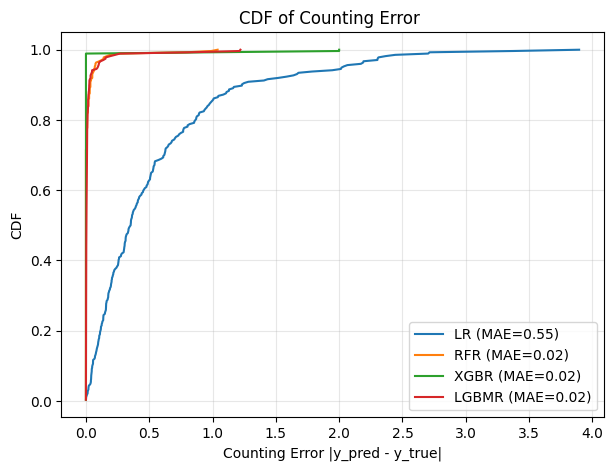

In [65]:
plot_cdf_models(expanded_features_lltf, target_col="target")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366456
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 1722
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

MAE    RMSE    Bias      R²    Acc@0   Acc@±1  Acc@±2
Model                                                          
LR     0.1693  0.2450 -0.0284  0.9688   0.0000  100.000   100.0
RFR    0.0259  0.0783  0.0011  0.9968  64.5985  100.000   100.0
XGBR   0.0292  0.1706 -0.0019  0.9849   0.0000   99.635   100.0
LGBMR  0.0343  0.0798  0.0071  0.9967   0.0000  100.000   100.0

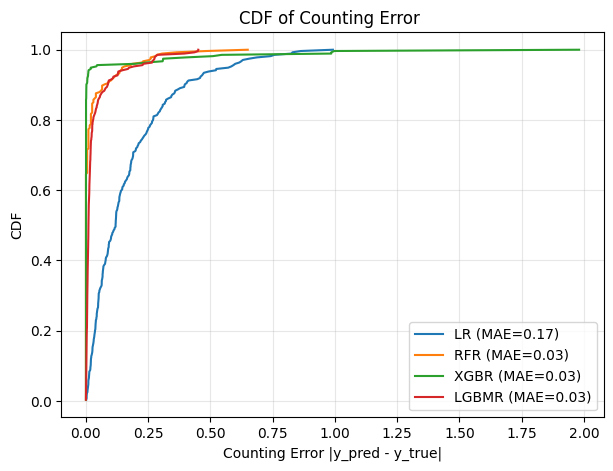

In [66]:
plot_cdf_models(expanded_features_htltf, target_col="target")


In [67]:
# ===========================================================
# Funzione per calcolare CDF per un dataset e un modello
# ===========================================================
def compute_cdf_for_dataset(dataset, model_name, target_col="target"):
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione solo per Linear Regression
    if model_name == "LR":
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    errors = np.abs(y_pred - y_test)
    mae = mean_absolute_error(y_test, y_pred)

    sorted_err = np.sort(errors)
    cdf = np.arange(1, len(errors) + 1) / len(errors)

    return sorted_err, cdf, mae


# ===========================================================
# Funzione per plottare LLTF vs HT-LTF
# ===========================================================
def plot_cdf_comparison(dataset_lltf, dataset_htltf, model_name="RFR", target_col="target"):
    err_lltf, cdf_lltf, mae_lltf = compute_cdf_for_dataset(dataset_lltf, model_name, target_col)
    err_htltf, cdf_htltf, mae_htltf = compute_cdf_for_dataset(dataset_htltf, model_name, target_col)

    plt.figure(figsize=(7,5))
    plt.plot(err_lltf, cdf_lltf, color="tab:blue", linewidth=1.8,
             label=f"LLTF (MAE={mae_lltf:.2f})")
    plt.plot(err_htltf, cdf_htltf, color="tab:orange", linewidth=1.8,
             label=f"HT-LTF (MAE={mae_htltf:.2f})")

    plt.title(f"CDF of Counting Error ({model_name})")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

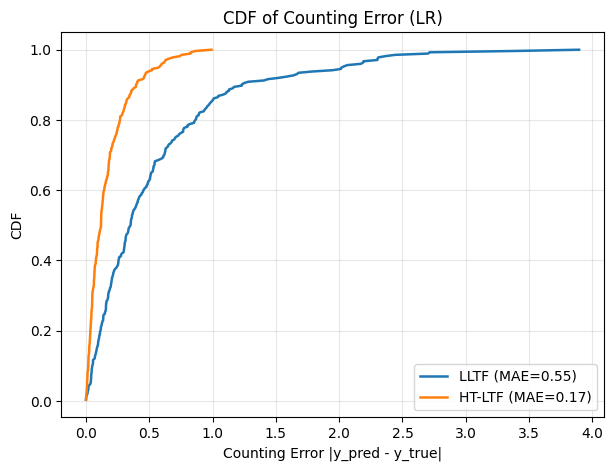

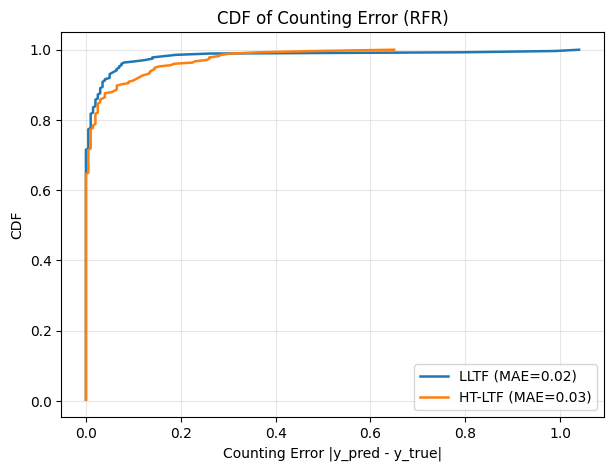

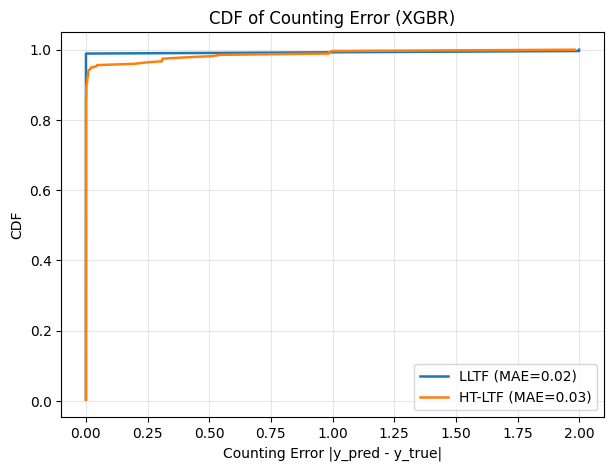

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175715
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

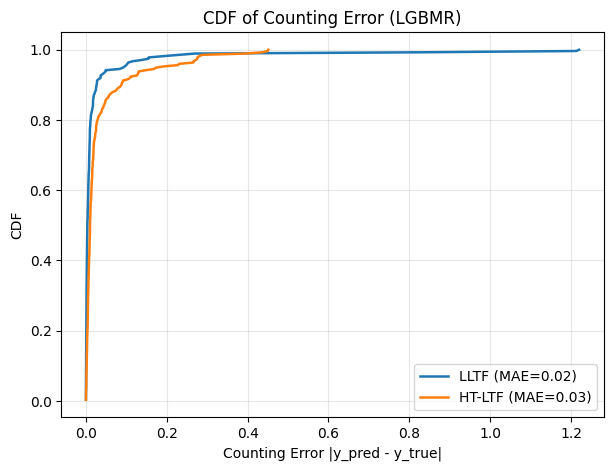

In [68]:
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="RFR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="XGBR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LGBMR")


In [69]:
def feature_group_importance(dataset, target_col="target"):
    """
    Valuta l'utilità di ciascun gruppo di feature (std, avg, iqr, adj, euc, ecc.)
    addestrando un modello separato per ogni gruppo.
    Restituisce un DataFrame con MAE per gruppo.
    """
    groups = {
        "STD": dataset.filter(like="std_"),
        "MIN": dataset.filter(like="min_"),
        "MAX": dataset.filter(like="max_"),
        "AVG": dataset.filter(like="avg_"),
        "QTL": dataset.filter(like="qtl_"),
        "QTU": dataset.filter(like="qtu_"),
        "IQR": dataset.filter(like="iqr_"),
        "ADJ": dataset.filter(like="adj_"),
        "EUC": dataset[["euc"]] if "euc" in dataset.columns else None
    }

    y = dataset[target_col]
    results = {}

    for name, X in groups.items():
        if X is None or X.empty:
            continue

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model = RandomForestRegressor(n_estimators=200, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = mae

    results_df = pd.DataFrame.from_dict(results, orient="index", columns=["MAE"]).sort_values(by="MAE")
    return results_df


In [70]:
results_lltf = feature_group_importance(expanded_features_lltf, target_col="target")
print(results_lltf)


          MAE
MAX  0.005310
QTU  0.014964
ADJ  0.030055
AVG  0.033193
MIN  0.056989
QTL  0.059252
IQR  0.151277
STD  0.163303


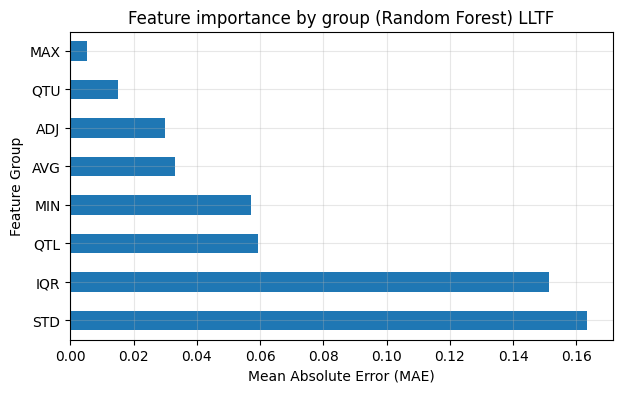

In [71]:
results_lltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) LLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


In [72]:
results_htltf = feature_group_importance(expanded_features_htltf, target_col="target")
print(results_htltf)


          MAE
QTU  0.033485
AVG  0.042208
MAX  0.046898
ADJ  0.064818
MIN  0.065383
QTL  0.086916
STD  0.150328
IQR  0.190639


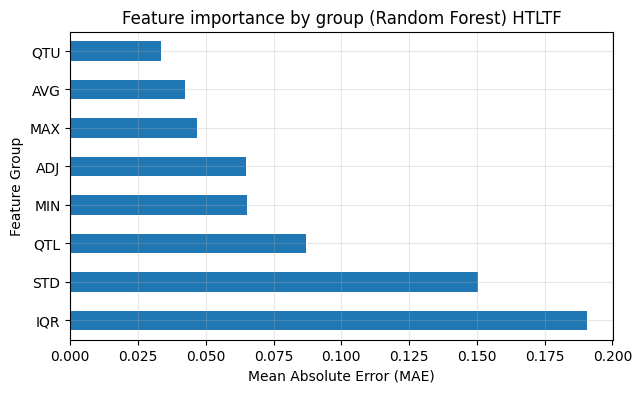

In [73]:
results_htltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) HTLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


In [74]:
# =======================================================
# Funzione: calcola feature importance per più modelli
# =======================================================
def compute_feature_importances(dataset, target_col="target", top_n=15):
    """
    Calcola e confronta l'importanza delle feature per RandomForest, XGBoost e LightGBM.
    Restituisce i 15 attributi più importanti mediati tra i modelli.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    importances = {}
    feature_names = X.columns

    for name, model in models.items():
        model.fit(X_train, y_train)

        if name == "XGBoost":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        elif name == "LightGBM":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        else:
            imp = model.feature_importances_ / np.sum(model.feature_importances_)

        importances[name] = imp

    # Costruiamo DataFrame con le importanze
    imp_df = pd.DataFrame(importances, index=feature_names)
    imp_df["mean_importance"] = imp_df.mean(axis=1)

    # Selezioniamo le feature più importanti
    top_features = imp_df.sort_values("mean_importance", ascending=False).head(top_n)
    return top_features


# =======================================================
# Funzione: visualizza graficamente
# =======================================================
def plot_feature_importances(top_features):
    plt.figure(figsize=(9, 5))
    top_features[["RandomForest", "XGBoost", "LightGBM"]].plot(kind="barh", figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.title("Feature Importance Comparison (RandomForest / XGBoost / LightGBM)")
    plt.xlabel("Normalized Importance")
    plt.ylabel("Feature")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175439
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<Figure size 900x500 with 0 Axes>

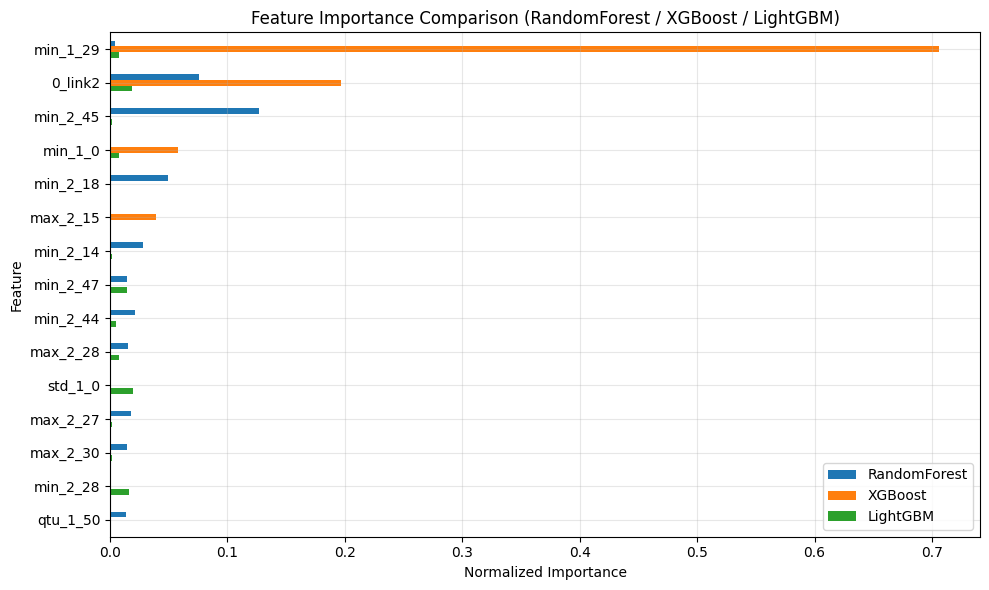

In [75]:
top_features_lltf = compute_feature_importances(expanded_features_lltf, target_col="target", top_n=15)
plot_feature_importances(top_features_lltf)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365834
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 1722
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

<Figure size 900x500 with 0 Axes>

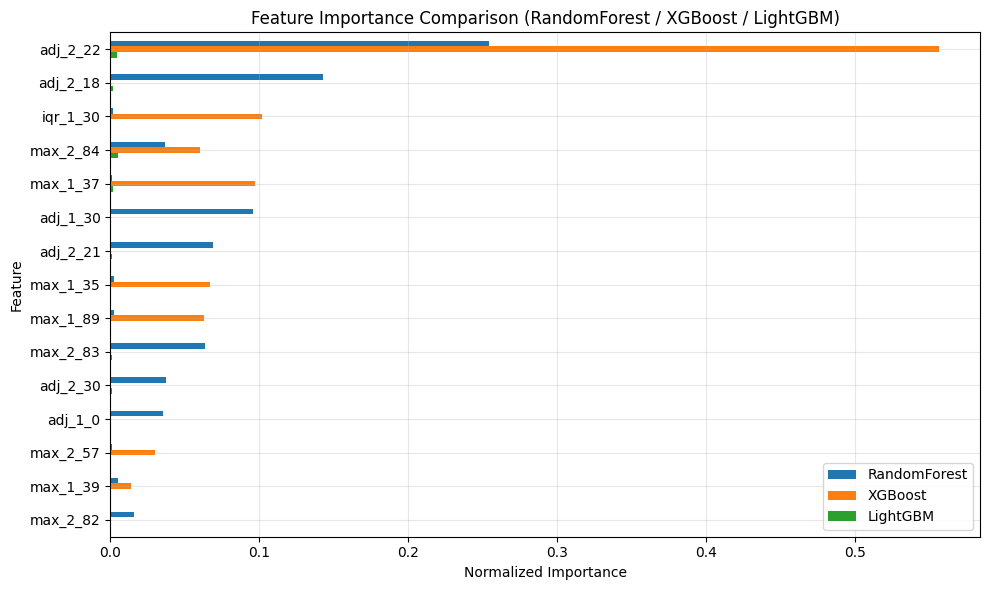

In [76]:
top_features_htltf = compute_feature_importances(expanded_features_htltf, target_col="target", top_n=15)
plot_feature_importances(top_features_htltf)


# classificazione

In [77]:
# ================================================================
# Funzione: addestra i modelli di classificazione del paper
# ================================================================
def train_classifiers(dataset, target_col="target"):
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        print(f"\n=== {name} ===")
        print(classification_report(y_test, y_pred, digits=3))

        # Confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    # Tabella riassuntiva accuracies
    results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)
    print("\n📊 Summary of accuracies:")
    print(results_df)
    return results_df

==== LLTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     0.980     0.990        51
           2      0.984     1.000     0.992        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          0.996       274
   macro avg      0.997     0.996     0.996       274
weighted avg      0.996     0.996     0.996       274



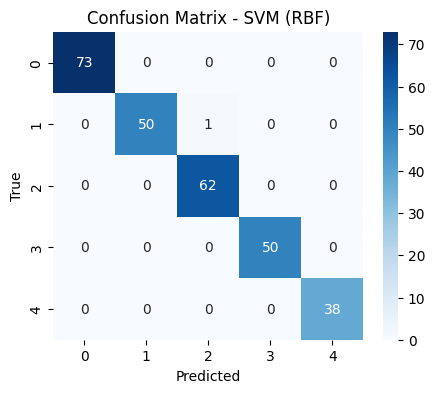


=== KNN ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     0.980     0.990        51
           2      0.984     1.000     0.992        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          0.996       274
   macro avg      0.997     0.996     0.996       274
weighted avg      0.996     0.996     0.996       274



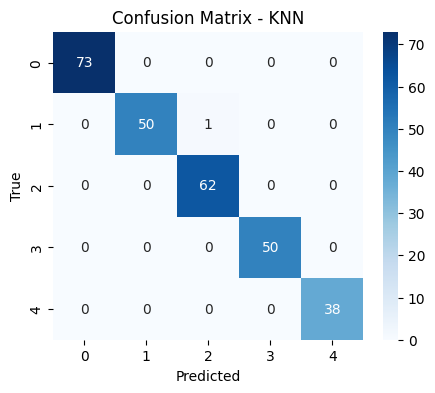


=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     0.980     0.990        51
           2      0.984     1.000     0.992        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          0.996       274
   macro avg      0.997     0.996     0.996       274
weighted avg      0.996     0.996     0.996       274



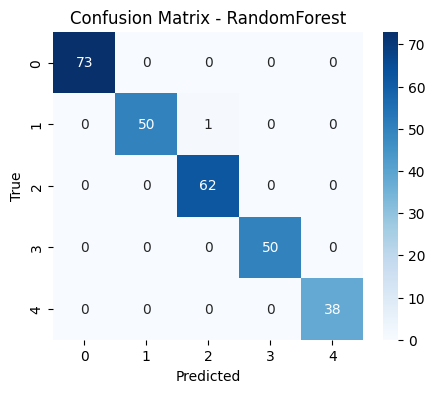

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          1.000       274
   macro avg      1.000     1.000     1.000       274
weighted avg      1.000     1.000     1.000       274



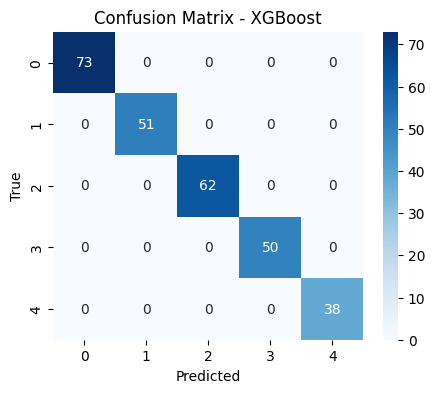

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175439
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score -1.326871
[LightGBM] [Info] Start training from score -1.669278
[LightGBM] [Info] Start training from score -1.493925
[LightGBM] [Info] Start training from score -1.686085
[LightGBM] [Info] Start training from score -1.990862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


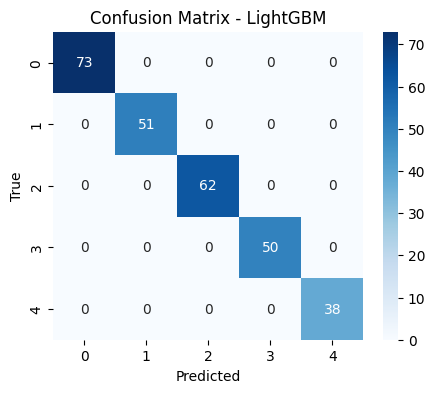


=== GBDT ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          1.000       274
   macro avg      1.000     1.000     1.000       274
weighted avg      1.000     1.000     1.000       274



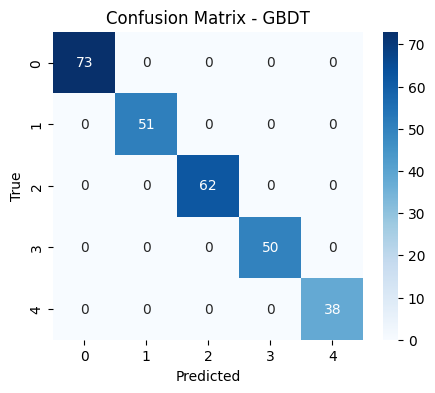


📊 Summary of accuracies:
          Model  Accuracy
4      LightGBM   1.00000
3       XGBoost   1.00000
5          GBDT   1.00000
0     SVM (RBF)   0.99635
1           KNN   0.99635
2  RandomForest   0.99635

==== HT-LTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          1.000       274
   macro avg      1.000     1.000     1.000       274
weighted avg      1.000     1.000     1.000       274



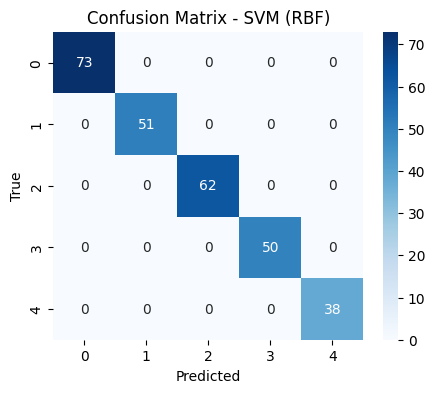


=== KNN ===
              precision    recall  f1-score   support

           0      0.986     1.000     0.993        73
           1      1.000     1.000     1.000        51
           2      1.000     0.984     0.992        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          0.996       274
   macro avg      0.997     0.997     0.997       274
weighted avg      0.996     0.996     0.996       274



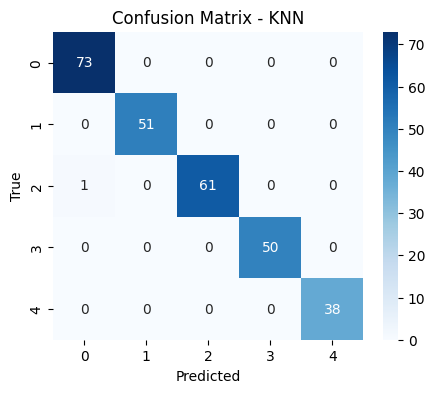


=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          1.000       274
   macro avg      1.000     1.000     1.000       274
weighted avg      1.000     1.000     1.000       274



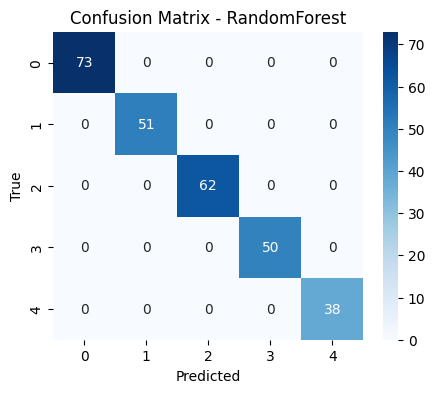

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:07:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      0.980     1.000     0.990        50
           4      1.000     0.974     0.987        38

    accuracy                          0.996       274
   macro avg      0.996     0.995     0.995       274
weighted avg      0.996     0.996     0.996       274



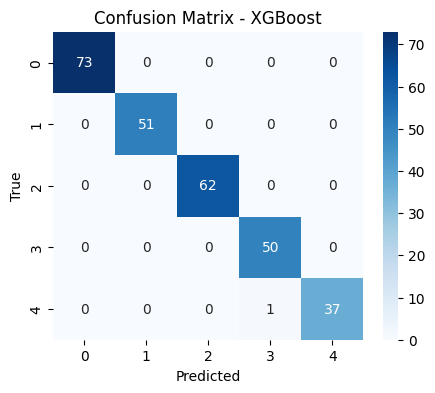

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365834
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 1722
[LightGBM] [Info] Start training from score -1.326871
[LightGBM] [Info] Start training from score -1.669278
[LightGBM] [Info] Start training from score -1.493925
[LightGBM] [Info] Start training from score -1.686085
[LightGBM] [Info] Start training from score -1.990862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LightGBM ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        73
           1      1.000     1.000     1.000        51
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        50
           4      1.000     1.000     1.000        38

    accuracy                          1.000       274
   macro avg      1.000     1.000     1.000       274
weighted avg      1.000     1.000     1.000       274



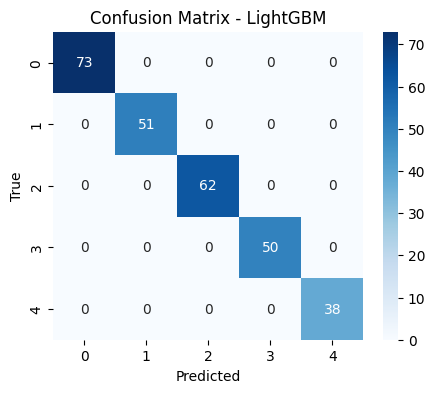


=== GBDT ===
              precision    recall  f1-score   support

           0      0.986     1.000     0.993        73
           1      1.000     0.980     0.990        51
           2      0.984     1.000     0.992        62
           3      1.000     1.000     1.000        50
           4      1.000     0.974     0.987        38

    accuracy                          0.993       274
   macro avg      0.994     0.991     0.992       274
weighted avg      0.993     0.993     0.993       274



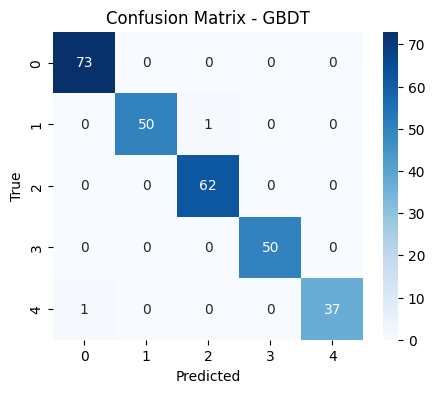


📊 Summary of accuracies:
          Model  Accuracy
0     SVM (RBF)  1.000000
2  RandomForest  1.000000
4      LightGBM  1.000000
1           KNN  0.996350
3       XGBoost  0.996350
5          GBDT  0.992701


In [78]:
print("==== LLTF CLASSIFICATION ====")
acc_lltf = train_classifiers(expanded_features_lltf)

print("\n==== HT-LTF CLASSIFICATION ====")
acc_htltf = train_classifiers(expanded_features_htltf)


# k-Fold Cross-Validation

In [79]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline

In [80]:
# ===============================================================
# Funzione: esegue k-Fold CV 
# ===============================================================
def kfold_cross_validation(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per LR, RFR, XGBR e LGBMR.
    Restituisce media e std del MAE per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Definizione modelli
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)
        mae_mean = -scores.mean()
        mae_std = scores.std()
        results[name] = (mae_mean, mae_std)
        print(f"{name:20s} → MAE medio = {mae_mean:.4f} ± {mae_std:.4f}")

    results_df = pd.DataFrame(results, index=["MAE_mean", "MAE_std"]).T
    return results_df

In [81]:
print("===== K-FOLD CROSS-VALIDATION: LLTF =====")
cv_results_lltf = kfold_cross_validation(expanded_features_lltf, target_col="target", n_splits=5)

print("\n===== K-FOLD CROSS-VALIDATION: HT-LTF =====")
cv_results_htltf = kfold_cross_validation(expanded_features_htltf, target_col="target", n_splits=5)


===== K-FOLD CROSS-VALIDATION: LLTF =====


Linear Regression    → MAE medio = 2.4426 ± 0.8284
Random Forest        → MAE medio = 0.0251 ± 0.0230
XGBoost              → MAE medio = 0.0257 ± 0.0418
LightGBM             → MAE medio = 0.0358 ± 0.0430

===== K-FOLD CROSS-VALIDATION: HT-LTF =====
Linear Regression    → MAE medio = 0.1788 ± 0.0162
Random Forest        → MAE medio = 0.0279 ± 0.0061
XGBoost              → MAE medio = 0.0242 ± 0.0091
LightGBM             → MAE medio = 0.0362 ± 0.0120


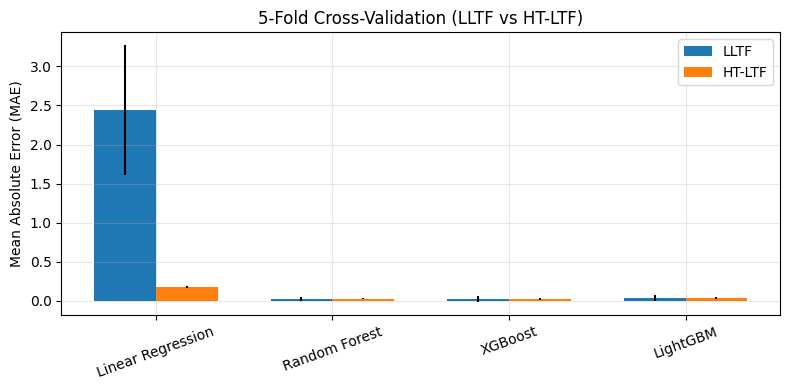

In [82]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_results_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_results_lltf["MAE_mean"], width, yerr=cv_results_lltf["MAE_std"], label="LLTF")
plt.bar(x + width/2, cv_results_htltf["MAE_mean"], width, yerr=cv_results_htltf["MAE_std"], label="HT-LTF")

plt.xticks(x, cv_results_lltf.index, rotation=20)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("5-Fold Cross-Validation (LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [83]:
# =======================================================
# Funzione per k-Fold CV dei modelli di classificazione
# =======================================================
def kfold_classification_cv(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per i modelli di classificazione.
    Ritorna accuracy media e deviazione standard per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    accuracy_scorer = make_scorer(accuracy_score)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=accuracy_scorer, n_jobs=-1)
        acc_mean = scores.mean()
        acc_std = scores.std()
        results[name] = (acc_mean, acc_std)
        print(f"{name:20s} → Accuracy media = {acc_mean:.4f} ± {acc_std:.4f}")

    results_df = pd.DataFrame(results, index=["Accuracy_mean", "Accuracy_std"]).T
    return results_df

In [84]:
print("===== K-FOLD CLASSIFICATION: LLTF =====")
cv_class_lltf = kfold_classification_cv(expanded_features_lltf, target_col="target")

print("\n===== K-FOLD CLASSIFICATION: HT-LTF =====")
cv_class_htltf = kfold_classification_cv(expanded_features_htltf, target_col="target")


===== K-FOLD CLASSIFICATION: LLTF =====
SVM (RBF)            → Accuracy media = 0.9978 ± 0.0027
KNN                  → Accuracy media = 0.9967 ± 0.0044
Random Forest        → Accuracy media = 0.9978 ± 0.0044
XGBoost              → Accuracy media = 0.9945 ± 0.0049
LightGBM             → Accuracy media = 0.9978 ± 0.0027
GBDT                 → Accuracy media = 0.9956 ± 0.0064

===== K-FOLD CLASSIFICATION: HT-LTF =====
SVM (RBF)            → Accuracy media = 1.0000 ± 0.0000
KNN                  → Accuracy media = 0.9989 ± 0.0022
Random Forest        → Accuracy media = 1.0000 ± 0.0000
XGBoost              → Accuracy media = 0.9978 ± 0.0027
LightGBM             → Accuracy media = 0.9956 ± 0.0041
GBDT                 → Accuracy media = 0.9956 ± 0.0041


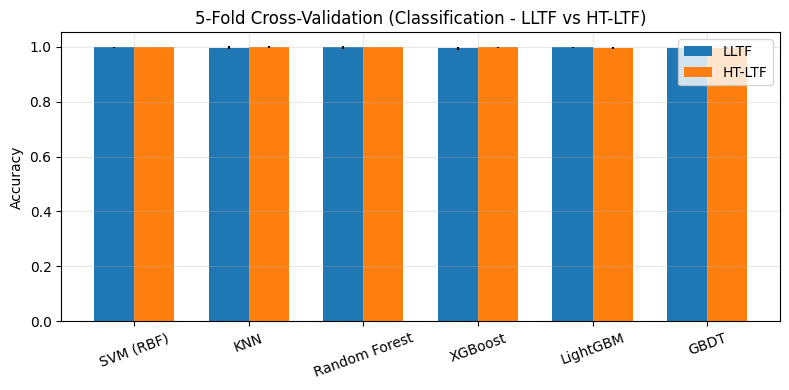

In [85]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_class_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_class_lltf["Accuracy_mean"], width, yerr=cv_class_lltf["Accuracy_std"], label="LLTF")
plt.bar(x + width/2, cv_class_htltf["Accuracy_mean"], width, yerr=cv_class_htltf["Accuracy_std"], label="HT-LTF")

plt.xticks(x, cv_class_lltf.index, rotation=20)
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation (Classification - LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Nuove metriche per la regressione

In [86]:

# =======================================================
# Funzione aggiornata con metriche estese
# =======================================================
def plot_cdf_models(dataset, target_col="target"):
    """
    Calcola e visualizza le curve CDF dell'errore di conteggio
    per i modelli del paper Wi-CaL (LR, RFR, XGBR, LGBMR),
    includendo metriche aggiuntive e una tabella riassuntiva.
    """

    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    # Divisione X / y
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione solo per la regressione lineare
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = []  # per la tabella finale

    # Addestramento e calcolo metriche per ogni modello
    for name, model in models.items():
        if name == "LR":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # -------------------
        # Calcolo metriche
        # -------------------
        errors = np.abs(y_pred - y_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        bias = np.mean(y_pred - y_test)
        r2 = r2_score(y_test, y_pred)

        acc_0 = np.mean(errors <= 0) * 100
        acc_1 = np.mean(errors <= 1) * 100
        acc_2 = np.mean(errors <= 2) * 100

        # -------------------
        # Salviamo i risultati per la tabella
        # -------------------
        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "Bias": bias,
            "R²": r2,
            "Acc@0": acc_0,
            "Acc@±1": acc_1,
            "Acc@±2": acc_2
        })

    # -------------------
    # Tabella finale
    # -------------------
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index("Model").round(4)

    display(results_df)
  

    return results_df


In [87]:
plot_cdf_models(expanded_features_lltf, target_col="target")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175715
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score 1.739403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

MAE    RMSE    Bias      R²    Acc@0   Acc@±1    Acc@±2
Model                                                            
LR     0.5514  0.8263 -0.0365  0.6448   0.0000  85.4015   94.1606
RFR    0.0207  0.1040 -0.0072  0.9944  71.5328  99.6350  100.0000
XGBR   0.0183  0.1812 -0.0109  0.9829   0.0000  99.2701  100.0000
LGBMR  0.0248  0.1205  0.0002  0.9924   0.0000  99.2701  100.0000

MAE    RMSE    Bias      R²    Acc@0   Acc@±1    Acc@±2
Model                                                            
LR     0.5514  0.8263 -0.0365  0.6448   0.0000  85.4015   94.1606
RFR    0.0207  0.1040 -0.0072  0.9944  71.5328  99.6350  100.0000
XGBR   0.0183  0.1812 -0.0109  0.9829   0.0000  99.2701  100.0000
LGBMR  0.0248  0.1205  0.0002  0.9924   0.0000  99.2701  100.0000

In [88]:
def train_classifiers_2(dataset, target_col="target", titolo_suffix="Confusion Matrices"):

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42,
                                 use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    # Risultati
    f1_results = {}
    accuracy_results = {}
    time_results = {}
    metrics_table = []

    # -------------------------------
    # FIGURA UNICA DELLE CONFUSION MATRIX
    # -------------------------------
    n_models = len(models)
    n_cols = 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):

        # --- TEMPO DI TRAINING ---
        start = time.perf_counter()
        model.fit(X_train, y_train)
        train_time = time.perf_counter() - start
        time_results[name] = train_time

        # Predizione
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy_results[name] = accuracy_score(y_test, y_pred)

        # Report
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        f1_macro = report_dict["macro avg"]["f1-score"]
        f1_results[name] = f1_macro

        # METRICHE DETTAGLIATE
        for label, values in report_dict.items():
            if label.isdigit():
                metrics_table.append({
                    "Model": name,
                    "Class": label,
                    "Precision": values["precision"],
                    "Recall": values["recall"],
                    "F1-score": values["f1-score"],
                    "Support": values["support"],
                    "Train_time_sec": train_time
                })

        # Confusion matrix
        ax = axes[idx]
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f",
                    cmap="Blues", ax=ax)
        ax.set_title(f"{name}\nTraining time: {train_time:.3f} sec  | F1-macro: {f1_macro:.3f} | Accuracy: {accuracy_results[name]:.3f}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    # Rimuove subplot vuoti
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(f"{titolo_suffix}.png", dpi=300)
    plt.show()
    print(f"\n📁 Confusion matrices salvate in:{titolo_suffix}.png")

    # -------------------------------
    # TABELLA RIASSUNTIVA ORDINATA PER F1 MACRO
    # -------------------------------
    f1_df = pd.DataFrame(
        {"Model": list(f1_results.keys()), 
         "F1_macro": list(f1_results.values()),
         "Train_time_sec": list(time_results.values())}
    ).sort_values("F1_macro", ascending=False)

    print("\n📊 Summary of F1 Macro scores (+ training time):")
    print(f1_df)



    # -------------------------------
    # TABELLA COMPLETA DELLE METRICHE
    # -------------------------------
    metrics_df = pd.DataFrame(metrics_table)

    print("\n📋 Full Classification Metrics Table (with training times):")
    print(metrics_df)

    return f1_df, metrics_df


In [94]:
import math
import time
import re

In [ ]:
results_lltf = train_classifiers_2(expanded_features_htltf,titolo_suffix="Confusion Matrices HTLTF con filtro 2 canali separati - classi distine  ")


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:34:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365827
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 1722
[LightGBM] [Info] Start training from score -1.326871
[LightGBM] [Info] Start training from score -0.884616
[LightGBM] [Info] Start training from score -1.133760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


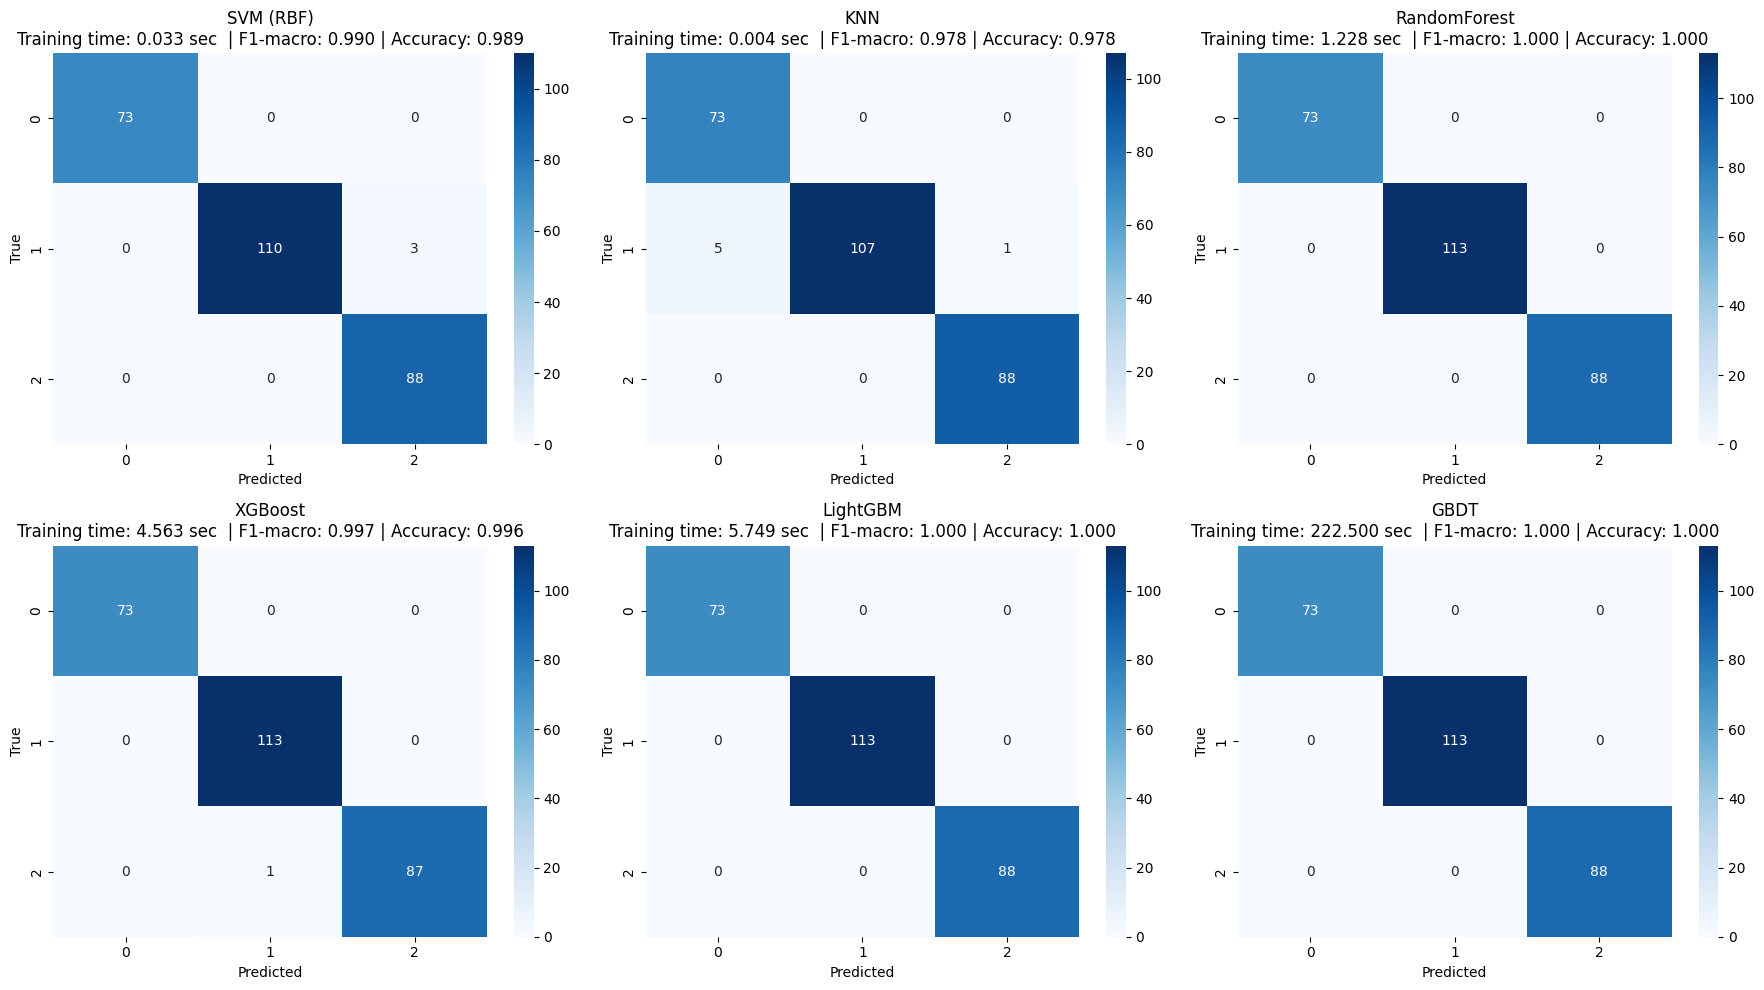


📁 Confusion matrices salvate in:Confusion Matrices HTLTF con filtro 2 canali separati - classi distine  .png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
4      LightGBM  1.000000        5.749481
2  RandomForest  1.000000        1.228354
5          GBDT  1.000000      222.499919
3       XGBoost  0.996627        4.562580
0     SVM (RBF)  0.989929        0.032668
1           KNN  0.977988        0.003968

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision    Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0   1.000000  1.000000  1.000000     73.0        0.032668
1      SVM (RBF)     1   1.000000  0.973451  0.986547    113.0        0.032668
2      SVM (RBF)     2   0.967033  1.000000  0.983240     88.0        0.032668
3            KNN     0   0.935897  1.000000  0.966887     73.0        0.003968
4            KNN     1   1.000000  0.946903  0.972727    113.0        0.003968
5            

In [102]:
results_lltf = train_classifiers_2(expanded_features_htltf,titolo_suffix="Confusion Matrices HTLTF con filtro 2 canali separati - classi distine  ")


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:26:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175439
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 826
[LightGBM] [Info] Start training from score -1.326871
[LightGBM] [Info] Start training from score -1.669278
[LightGBM] [Info] Start training from score -1.493925
[LightGBM] [Info] Start training from score -1.686085
[LightGBM] [Info] Start training from score -1.990862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


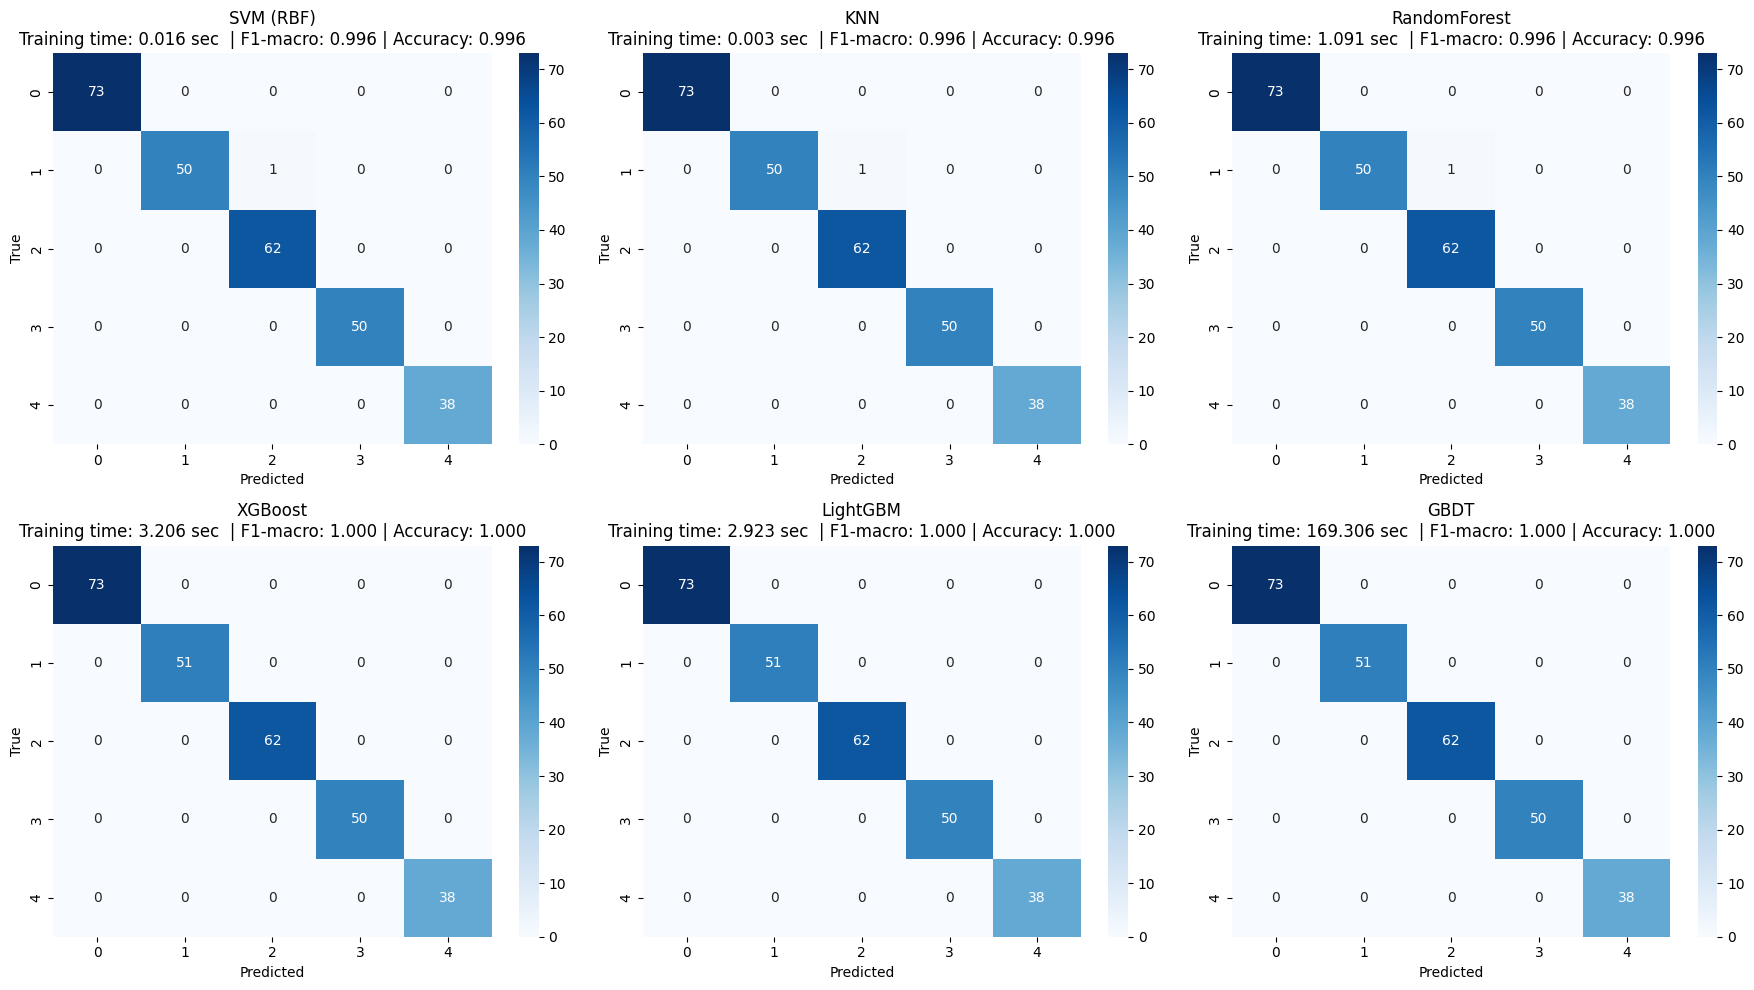


📁 Confusion matrices salvate in:Confusion Matrices LLTF con filtro 2 canali separati - classi distine  .png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
4      LightGBM   1.00000        2.923370
3       XGBoost   1.00000        3.206432
5          GBDT   1.00000      169.306350
0     SVM (RBF)   0.99642        0.016141
1           KNN   0.99642        0.002724
2  RandomForest   0.99642        1.090866

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision    Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0   1.000000  1.000000  1.000000     73.0        0.016141
1      SVM (RBF)     1   1.000000  0.980392  0.990099     51.0        0.016141
2      SVM (RBF)     2   0.984127  1.000000  0.992000     62.0        0.016141
3      SVM (RBF)     3   1.000000  1.000000  1.000000     50.0        0.016141
4      SVM (RBF)     4   1.000000  1.000000  1.000000     38.0        0.016141
5            K

In [95]:
results_lltf = train_classifiers_2(expanded_features_lltf,titolo_suffix="Confusion Matrices LLTF con filtro 2 canali separati - classi distine  ")